### Scraping Electricity Consumption Data for Delhi from SLDC Website

In [1]:
import requests
import csv
import os
import time
from bs4 import BeautifulSoup

# Base URL for scraping
BASE_URL = 'http://www.delhisldc.org/Loaddata.aspx?mode='

# Define Year Range (Strictly from 2020 to 2024)
year_range = range(2020, 2025)

# Directory for saving the scraped data
SAVE_DIR = 'SLDC_Data'
os.makedirs(SAVE_DIR, exist_ok=True)

# Define CSV filename
csv_filename = os.path.join(SAVE_DIR, 'Delhi_Data_15min.csv')

# Open the CSV file and write the header row
with open(csv_filename, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['date', 'time', 'load_consumption'])  # Header

    # Iterate through years, months, and days
    for year in year_range:
        for month in range(1, 13):
            # Get the max number of days in the current month
            if month in [4, 6, 9, 11]:  # April, June, September, November
                max_day = 30
            elif month == 2:  # February
                max_day = 29 if (year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)) else 28
            else:  # All other months
                max_day = 31

            # Iterate over each day
            for day in range(1, max_day + 1):
                date_str = f'{day:02d}/{month:02d}/{year}'
                print(f'Scraping data for {date_str}...')

                try:
                    # Send GET request
                    response = requests.get(BASE_URL + date_str)
                    soup = BeautifulSoup(response.text, 'lxml')

                    # Find the required table
                    table = soup.find('table', {'id': 'ContentPlaceHolder3_DGGridAv'})
                    if not table:
                        print(f"No data found for {date_str}. Skipping...")
                        continue

                    # Extract rows
                    rows = table.find_all('tr')[1:]  # Skipping header row

                    # Process each row
                    for row in rows:
                        cols = row.find_all('td')
                        if len(cols) < 2:
                            continue

                        time_text = cols[0].text.strip()  # Extract time
                        load_text = cols[1].text.strip()  # Extract load consumption

                        # Ensure 15-minute interval format
                        if time_text.endswith(('00', '15', '30', '45')):
                            writer.writerow([date_str, time_text, load_text])

                    # Respect server rate limits
                    time.sleep(1)

                except Exception as e:
                    print(f"Error scraping {date_str}: {e}")

print(f"\n Data scraping completed. All data saved in: {csv_filename}")


Scraping data for 01/01/2020...
Scraping data for 02/01/2020...
Scraping data for 03/01/2020...
Scraping data for 04/01/2020...
Scraping data for 05/01/2020...
Scraping data for 06/01/2020...
Scraping data for 07/01/2020...
Scraping data for 08/01/2020...
Scraping data for 09/01/2020...
Scraping data for 10/01/2020...
Scraping data for 11/01/2020...
Scraping data for 12/01/2020...
Scraping data for 13/01/2020...
Scraping data for 14/01/2020...
Scraping data for 15/01/2020...
Scraping data for 16/01/2020...
Scraping data for 17/01/2020...
Scraping data for 18/01/2020...
Scraping data for 19/01/2020...
Scraping data for 20/01/2020...
Scraping data for 21/01/2020...
Scraping data for 22/01/2020...
Scraping data for 23/01/2020...
Scraping data for 24/01/2020...
Scraping data for 25/01/2020...
Scraping data for 26/01/2020...
Scraping data for 27/01/2020...
Scraping data for 28/01/2020...
Scraping data for 29/01/2020...
Scraping data for 30/01/2020...
Scraping data for 31/01/2020...
Scraping

In [1]:
import requests
import csv
import os
import time
import re
from bs4 import BeautifulSoup
from requests.exceptions import RequestException

# Base URL for scraping
BASE_URL = 'http://www.delhisldc.org/Loaddata.aspx?mode='

# Define Year Range
year_range = range(2020, 2025)

# Directory for saving data
SAVE_DIR = 'SLDC_Data'
os.makedirs(SAVE_DIR, exist_ok=True)

# Define CSV filename
csv_filename = os.path.join(SAVE_DIR, 'Delhi_Data_15min.csv')

# Open CSV file
with open(csv_filename, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['date', 'time', 'load_consumption'])  # Header row

    for year in year_range:
        for month in range(1, 13):
            max_day = 30 if month in [4, 6, 9, 11] else (29 if (month == 2 and (year % 4 == 0 and (year % 100 != 0 or year % 400 == 0))) else (28 if month == 2 else 31))
            
            for day in range(1, max_day + 1):
                date_str = f'{day:02d}/{month:02d}/{year}'
                print(f'Scraping data for {date_str}...')

                MAX_RETRIES = 3
                for _ in range(MAX_RETRIES):
                    try:
                        response = requests.get(BASE_URL + date_str, timeout=10)
                        response.raise_for_status()
                        break
                    except RequestException as e:
                        print(f"Retrying ({_+1}/{MAX_RETRIES}) due to error: {e}")
                        time.sleep(2)
                else:
                    print(f"Skipping {date_str} due to repeated failures.")
                    continue

                soup = BeautifulSoup(response.text, 'lxml')
                table = soup.find('table', {'id': 'ContentPlaceHolder3_DGGridAv'})
                if not table:
                    print(f"No data found for {date_str}. Skipping...")
                    continue

                rows = table.find_all('tr')[1:]
                rows_to_write = []

                for row in rows:
                    cols = row.find_all('td')
                    if len(cols) < 2:
                        continue

                    time_text = cols[0].text.strip()
                    load_text = cols[1].text.strip()

                    if re.match(r'^\d{2}:\d{2}$', time_text) and time_text[-2:] in ['00', '15', '30', '45']:
                        rows_to_write.append([date_str, time_text, load_text])

                writer.writerows(rows_to_write)
                time.sleep(1)  # Respect server limits

print(f"\nData scraping completed. All data saved in: {csv_filename}")

Scraping data for 01/01/2020...
Scraping data for 02/01/2020...
Scraping data for 03/01/2020...
Scraping data for 04/01/2020...
Scraping data for 05/01/2020...
Scraping data for 06/01/2020...
Scraping data for 07/01/2020...
Scraping data for 08/01/2020...
Scraping data for 09/01/2020...
Scraping data for 10/01/2020...
Scraping data for 11/01/2020...
Scraping data for 12/01/2020...
Scraping data for 13/01/2020...
Scraping data for 14/01/2020...
Scraping data for 15/01/2020...
Scraping data for 16/01/2020...
Scraping data for 17/01/2020...
Scraping data for 18/01/2020...
Scraping data for 19/01/2020...
Scraping data for 20/01/2020...
Scraping data for 21/01/2020...
Scraping data for 22/01/2020...
Scraping data for 23/01/2020...
Scraping data for 24/01/2020...
Scraping data for 25/01/2020...
Scraping data for 26/01/2020...
Scraping data for 27/01/2020...
Scraping data for 28/01/2020...
Scraping data for 29/01/2020...
Scraping data for 30/01/2020...
Scraping data for 31/01/2020...
Scraping

Scraping data for 14/09/2020...
Scraping data for 15/09/2020...
Scraping data for 16/09/2020...
Scraping data for 17/09/2020...
Scraping data for 18/09/2020...
Scraping data for 19/09/2020...
Scraping data for 20/09/2020...
Scraping data for 21/09/2020...
Scraping data for 22/09/2020...
Scraping data for 23/09/2020...
Scraping data for 24/09/2020...
Scraping data for 25/09/2020...
Scraping data for 26/09/2020...
Scraping data for 27/09/2020...
Scraping data for 28/09/2020...
Scraping data for 29/09/2020...
Scraping data for 30/09/2020...
Scraping data for 01/10/2020...
Scraping data for 02/10/2020...
Scraping data for 03/10/2020...
Scraping data for 04/10/2020...
Scraping data for 05/10/2020...
Scraping data for 06/10/2020...
Scraping data for 07/10/2020...
Scraping data for 08/10/2020...
Scraping data for 09/10/2020...
Scraping data for 10/10/2020...
Scraping data for 11/10/2020...
Scraping data for 12/10/2020...
Scraping data for 13/10/2020...
Scraping data for 14/10/2020...
Scraping

Scraping data for 29/05/2021...
Scraping data for 30/05/2021...
Scraping data for 31/05/2021...
Scraping data for 01/06/2021...
Scraping data for 02/06/2021...
Scraping data for 03/06/2021...
Scraping data for 04/06/2021...
Scraping data for 05/06/2021...
Scraping data for 06/06/2021...
Scraping data for 07/06/2021...
Scraping data for 08/06/2021...
Scraping data for 09/06/2021...
Scraping data for 10/06/2021...
Scraping data for 11/06/2021...
Scraping data for 12/06/2021...
Scraping data for 13/06/2021...
Scraping data for 14/06/2021...
Scraping data for 15/06/2021...
Scraping data for 16/06/2021...
Scraping data for 17/06/2021...
Scraping data for 18/06/2021...
Scraping data for 19/06/2021...
Scraping data for 20/06/2021...
Scraping data for 21/06/2021...
Scraping data for 22/06/2021...
Scraping data for 23/06/2021...
Scraping data for 24/06/2021...
Scraping data for 25/06/2021...
Scraping data for 26/06/2021...
Scraping data for 27/06/2021...
Scraping data for 28/06/2021...
Scraping

Scraping data for 09/01/2022...
Scraping data for 10/01/2022...
Scraping data for 11/01/2022...
Scraping data for 12/01/2022...
Scraping data for 13/01/2022...
Scraping data for 14/01/2022...
Scraping data for 15/01/2022...
Scraping data for 16/01/2022...
Scraping data for 17/01/2022...
Scraping data for 18/01/2022...
Scraping data for 19/01/2022...
Scraping data for 20/01/2022...
Scraping data for 21/01/2022...
Scraping data for 22/01/2022...
Scraping data for 23/01/2022...
Scraping data for 24/01/2022...
Scraping data for 25/01/2022...
Scraping data for 26/01/2022...
Scraping data for 27/01/2022...
Scraping data for 28/01/2022...
Scraping data for 29/01/2022...
Scraping data for 30/01/2022...
Scraping data for 31/01/2022...
Scraping data for 01/02/2022...
Scraping data for 02/02/2022...
Scraping data for 03/02/2022...
Scraping data for 04/02/2022...
Scraping data for 05/02/2022...
Scraping data for 06/02/2022...
Scraping data for 07/02/2022...
Scraping data for 08/02/2022...
Scraping

Scraping data for 23/09/2022...
Scraping data for 24/09/2022...
Scraping data for 25/09/2022...
Scraping data for 26/09/2022...
Scraping data for 27/09/2022...
Scraping data for 28/09/2022...
Scraping data for 29/09/2022...
Scraping data for 30/09/2022...
Scraping data for 01/10/2022...
Scraping data for 02/10/2022...
Scraping data for 03/10/2022...
Scraping data for 04/10/2022...
Scraping data for 05/10/2022...
Scraping data for 06/10/2022...
Scraping data for 07/10/2022...
Scraping data for 08/10/2022...
Scraping data for 09/10/2022...
Scraping data for 10/10/2022...
Scraping data for 11/10/2022...
Scraping data for 12/10/2022...
Scraping data for 13/10/2022...
Scraping data for 14/10/2022...
Scraping data for 15/10/2022...
Scraping data for 16/10/2022...
Scraping data for 17/10/2022...
Scraping data for 18/10/2022...
Scraping data for 19/10/2022...
Scraping data for 20/10/2022...
Scraping data for 21/10/2022...
Scraping data for 22/10/2022...
Scraping data for 23/10/2022...
Scraping

Scraping data for 07/06/2023...
Scraping data for 08/06/2023...
Scraping data for 09/06/2023...
Scraping data for 10/06/2023...
Scraping data for 11/06/2023...
Scraping data for 12/06/2023...
Scraping data for 13/06/2023...
Scraping data for 14/06/2023...
Scraping data for 15/06/2023...
Scraping data for 16/06/2023...
Scraping data for 17/06/2023...
Scraping data for 18/06/2023...
Scraping data for 19/06/2023...
Scraping data for 20/06/2023...
Scraping data for 21/06/2023...
Scraping data for 22/06/2023...
Scraping data for 23/06/2023...
Scraping data for 24/06/2023...
Scraping data for 25/06/2023...
Scraping data for 26/06/2023...
Scraping data for 27/06/2023...
Scraping data for 28/06/2023...
Scraping data for 29/06/2023...
Scraping data for 30/06/2023...
Scraping data for 01/07/2023...
Scraping data for 02/07/2023...
Scraping data for 03/07/2023...
Scraping data for 04/07/2023...
Scraping data for 05/07/2023...
Scraping data for 06/07/2023...
Scraping data for 07/07/2023...
Scraping

Scraping data for 17/02/2024...
Scraping data for 18/02/2024...
Scraping data for 19/02/2024...
Scraping data for 20/02/2024...
Scraping data for 21/02/2024...
Scraping data for 22/02/2024...
Scraping data for 23/02/2024...
Scraping data for 24/02/2024...
Scraping data for 25/02/2024...
Scraping data for 26/02/2024...
Scraping data for 27/02/2024...
Scraping data for 28/02/2024...
Scraping data for 29/02/2024...
Scraping data for 01/03/2024...
Scraping data for 02/03/2024...
Scraping data for 03/03/2024...
Scraping data for 04/03/2024...
Scraping data for 05/03/2024...
Scraping data for 06/03/2024...
Scraping data for 07/03/2024...
Scraping data for 08/03/2024...
Scraping data for 09/03/2024...
Scraping data for 10/03/2024...
Scraping data for 11/03/2024...
Scraping data for 12/03/2024...
Scraping data for 13/03/2024...
Scraping data for 14/03/2024...
Scraping data for 15/03/2024...
Scraping data for 16/03/2024...
Scraping data for 17/03/2024...
Scraping data for 18/03/2024...
Scraping

Scraping data for 31/10/2024...
Scraping data for 01/11/2024...
Scraping data for 02/11/2024...
Scraping data for 03/11/2024...
Scraping data for 04/11/2024...
Scraping data for 05/11/2024...
Scraping data for 06/11/2024...
Scraping data for 07/11/2024...
Scraping data for 08/11/2024...
Scraping data for 09/11/2024...
Scraping data for 10/11/2024...
Scraping data for 11/11/2024...
Scraping data for 12/11/2024...
Scraping data for 13/11/2024...
Scraping data for 14/11/2024...
Scraping data for 15/11/2024...
Scraping data for 16/11/2024...
Scraping data for 17/11/2024...
Scraping data for 18/11/2024...
Scraping data for 19/11/2024...
Scraping data for 20/11/2024...
Scraping data for 21/11/2024...
Scraping data for 22/11/2024...
Scraping data for 23/11/2024...
Scraping data for 24/11/2024...
Scraping data for 25/11/2024...
Scraping data for 26/11/2024...
Scraping data for 27/11/2024...
Scraping data for 28/11/2024...
Scraping data for 29/11/2024...
Scraping data for 30/11/2024...
Scraping

### Scraping Weather Data for Delhi from Weatherbit Website

In [ ]:
import requests
import csv
import time
from datetime import date, datetime

# Replace with your Weatherbit API key
API_KEY = '6f0e0438564e4955bc382b241af71fd3'

# Coordinates for Delhi
LAT = 28.6139
LON = 77.2090

# CSV file to save weather data
CSV_FILE = 'delhi_weather_15min.csv'

# Open CSV file and write header
with open(CSV_FILE, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['date', 'time', 'temperature', 'apparent_temp', 'rh', 'wind_speed', 'ghi', 'sea_lvl_pressure', 'dew_point'])

    # Loop over years and months
    for year in range(2020, 2025):
        for month in range(1, 13):
            # Calculate start and end dates
            start_date = date(year, month, 1)
            if month == 12:
                end_date = date(year + 1, 1, 1)
            else:
                end_date = date(year, month + 1, 1)

            start_date_str = start_date.strftime('%Y-%m-%d')
            end_date_str = end_date.strftime('%Y-%m-%d')

            # Construct API URL
            url = f'https://api.weatherbit.io/v2.0/history/subhourly?lat={LAT}&lon={LON}&start_date={start_date_str}&end_date={end_date_str}&key={API_KEY}&tz=local'

            # Send GET request
            response = requests.get(url)

            if response.status_code == 200:
                data = response.json()['data']
                for item in data:
                    timestamp = item['timestamp_local']
                    date_yyyymmdd, time_hhmmss = timestamp.split('T')
                    date_obj = datetime.strptime(date_yyyymmdd, '%Y-%m-%d')
                    date_str = date_obj.strftime('%d/%m/%Y')
                    time_str = time_hhmmss[:5]  # 'HH:MM'
                    row = [date_str, time_str, item['temp'], item['app_temp'], item['rh'], item['wind_spd'],item['ghi'],item['slp'],item['dewpt']]
                    writer.writerow(row)
            else:
                print(f"Failed to fetch data for {start_date_str} to {end_date_str}: {response.status_code}")

            # Sleep to respect rate limits
            time.sleep(10)

print(f"Weather data saved to {CSV_FILE}")

### Scraping Holiday Data from Time and Date Website

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Function to fetch holidays from timeanddate.com
def fetch_holidays(year):
    url = f"https://www.timeanddate.com/holidays/india/{year}"
    tables = pd.read_html(url)
    holiday_table = tables[0]
    # Print the available columns to check if they match expectations
    print(holiday_table.columns)
    # Select columns if they are available otherwise select available columns
    holiday_table = holiday_table[['Date', 'Type', 'Name'] if all(col in holiday_table.columns for col in ['Date', 'Type', 'Name']) else holiday_table.columns[:3]]
    holiday_table.columns = ['Date', 'Holiday Type', 'Holiday Name']
    holiday_table['Year'] = year
    return holiday_table

# Compile holidays from 2020 to 2024
all_holidays = pd.DataFrame()
for year in range(2020, 2025):
    yearly_holidays = fetch_holidays(year)
    all_holidays = pd.concat([all_holidays, yearly_holidays], ignore_index=True)

# Convert 'Date' and 'Year' to a single datetime column
all_holidays['Date'] = all_holidays['Date'].str.replace(r'\s*\(\d+\)', '', regex=True)
all_holidays['Full Date'] = all_holidays['Date'] + ' ' + all_holidays['Year'].astype(str)
all_holidays['Full Date'] = pd.to_datetime(all_holidays['Full Date'], format='%b %d %Y')

# Create a complete date range from 2020-01-01 to 2024-12-31
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 12, 31)
date_range = pd.date_range(start_date, end_date)

# Initialize the dataset
dataset = pd.DataFrame(date_range, columns=['Date'])
dataset['Holiday Name'] = ''
dataset['Holiday Flag'] = 0
dataset['Weekly Holiday'] = dataset['Date'].dt.dayofweek.apply(lambda x: 1 if x == 6 else 0)  # Sunday as weekly holiday

# Populate the dataset with holiday information
for index, row in all_holidays.iterrows():
    holiday_date = row['Full Date']
    if holiday_date in dataset['Date'].values:
        dataset.loc[dataset['Date'] == holiday_date, 'Holiday Name'] = row['Holiday Name']
        dataset.loc[dataset['Date'] == holiday_date, 'Holiday Flag'] = 1

# Format the 'Date' column as DD-MM-YYYY
dataset['Date'] = dataset['Date'].dt.strftime('%d-%m-%Y')

# Save to CSV
dataset.to_csv('Delhi_Holidays_2020_2024.csv', index=False)

print("Holiday dataset created successfully.")

In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [3]:
# Define file paths
demand_file = "SLDC Data Files/Delhi_Demand_Data_2020_2024.csv"
weather_file = "SLDC Data Files/delhi_weather_15min.csv"
holiday_file = "SLDC Data Files/Delhi_Holidays_2020_2024.csv"

# Load datasets
demand_df = pd.read_csv(demand_file, parse_dates=[['date', 'time']], dayfirst=True)
weather_df = pd.read_csv(weather_file, parse_dates=[['date', 'time']], dayfirst=True)
holiday_df = pd.read_csv(holiday_file, parse_dates=['Date'], dayfirst=True)

# Rename timestamp columns for consistency
demand_df.rename(columns={'date_time': 'timestamp'}, inplace=True)
weather_df.rename(columns={'date_time': 'timestamp'}, inplace=True)
holiday_df.rename(columns={'Date': 'timestamp'}, inplace=True)

# Sort by timestamp
demand_df.sort_values(by='timestamp', inplace=True)
weather_df.sort_values(by='timestamp', inplace=True)
holiday_df.sort_values(by='timestamp', inplace=True)

In [1]:
# Create a complete timestamp range (every 15 minutes from 2020 to 2024)
start_date = "2020-01-01 00:00:00"
end_date = "2024-12-31 23:45:00"
full_range = pd.date_range(start=start_date, end=end_date, freq='15T')

# Convert to DataFrame for comparison
full_range_df = pd.DataFrame({'timestamp': full_range})

# Identify missing timestamps
missing_demand = full_range_df[~full_range_df['timestamp'].isin(demand_df['timestamp'])]
missing_weather = full_range_df[~full_range_df['timestamp'].isin(weather_df['timestamp'])]

# Ensure holidays have unique dates (holidays should be daily)
holiday_dates = holiday_df['timestamp'].dt.date.unique()
expected_dates = pd.date_range(start=start_date, end=end_date, freq='D').date
missing_holidays = set(expected_dates) - set(holiday_dates)

# Print results
print(f"Missing demand timestamps: {len(missing_demand)}")
print(f"Missing weather timestamps: {len(missing_weather)}")
print(f"Missing holiday dates: {len(missing_holidays)}")

# Save missing timestamps for further inspection
missing_demand.to_csv("missing_demand_timestamps.csv", index=False)
missing_weather.to_csv("missing_weather_timestamps.csv", index=False)
pd.DataFrame({'missing_holidays': list(missing_holidays)}).to_csv("missing_holiday_dates.csv", index=False)

Missing demand timestamps: 6532
Missing weather timestamps: 0
Missing holiday dates: 0


In [5]:
# Extract dates from missing timestamps
missing_demand['date'] = missing_demand['timestamp'].dt.date

# Count missing entries per date
missing_dates_summary = missing_demand.groupby('date').size().reset_index(name='missing_count') 

# Save missing dates to a file
missing_dates_summary.to_csv("missing_demand_dates.csv", index=False)

# Print summary of missing data
print(missing_dates_summary.head(10))
print(f"Total unique dates with missing data: {missing_dates_summary.shape[0]}")

Top 10 problematic dates with missing data:
         date  missing_count
0  2020-02-15             44
1  2020-06-26             96
2  2020-07-03             32
3  2020-09-22             48
4  2020-09-24              4
5  2020-11-29             40
6  2020-12-25             20
7  2021-03-25              4
8  2021-04-25             24
9  2021-06-02             36
Total unique dates with missing data: 604


In [ ]:
# Load Demand Data (Assuming it has a 'timestamp' column in datetime format)
demand_data = pd.read_csv("SLDC Data Files/Delhi_Demand_Data_2020_2024.csv", parse_dates=[['date', 'time']])
demand_data = demand_data.sort_values(by='date_time').reset_index(drop=True)

# Step 1: Detect Short Gaps and Apply Interpolation
full_time_range = pd.date_range(start=demand_data['date_time'].min(), 
                                end=demand_data['date_time'].max(), 
                                freq='15min')
full_df = pd.DataFrame({'date_time': full_time_range})

# Merge with actual data
merged_df = full_df.merge(demand_data, on='date_time', how='left')

# Apply interpolation for short gaps (up to 6 consecutive timestamps)
merged_df['load_consumption'] = merged_df['load_consumption'].interpolate(method='linear', limit=6)

In [ ]:
# Step 2: Handle Full Missing Days Using Historical Trends
merged_df['weekday'] = merged_df['date_time'].dt.weekday
merged_df['date'] = merged_df['date_time'].dt.date

missing_days = merged_df[merged_df['load_consumption'].isna()]['date'].unique()

for missing_day in missing_days:
    weekday = merged_df.loc[merged_df['date'] == missing_day, 'weekday'].values[0]

    # Get nearest available past and future weekday data (Ensure 96 timestamps)
    past_days = merged_df[(merged_df['weekday'] == weekday) & (merged_df['date'] < missing_day)].groupby('date').tail(96)
    future_days = merged_df[(merged_df['weekday'] == weekday) & (merged_df['date'] > missing_day)].groupby('date').head(96)

    # If exact 96 timestamps are unavailable, take the closest available
    past_day = past_days.tail(96) if len(past_days) >= 96 else past_days
    future_day = future_days.head(96) if len(future_days) >= 96 else future_days

    if len(past_day) == 96 and len(future_day) == 96:
        avg_values = (past_day['load_consumption'].values + future_day['load_consumption'].values) / 2
        merged_df.loc[merged_df['date'] == missing_day, 'load_consumption'] = avg_values
    elif len(past_day) == 96:
        merged_df.loc[merged_df['date'] == missing_day, 'load_consumption'] = past_day['load_consumption'].values
    elif len(future_day) == 96:
        merged_df.loc[merged_df['date'] == missing_day, 'load_consumption'] = future_day['load_consumption'].values
    else:
        # Use overall weekday average if no past/future data exists
        weekday_mean = merged_df[merged_df['weekday'] == weekday]['load_consumption'].mean()
        merged_df.loc[merged_df['date'] == missing_day, 'load_consumption'] = weekday_mean

# Step 3: Handle Remaining Missing Values using Forward/Backward Fill
merged_df['load_consumption'] = merged_df['load_consumption'].fillna(method='ffill').fillna(method='bfill')

In [ ]:
# Step 4: Transform Holiday Data for Sub-hourly Format
holidays_df = pd.read_csv("SLDC Data Files/Delhi_Holidays_2020_2024.csv", parse_dates=['Date'])
holidays_df = holidays_df.rename(columns={'Date': 'date'})

# Expand holidays to sub-hourly
holidays_expanded = holidays_df.loc[holidays_df.index.repeat(96)].reset_index(drop=True)  # 96 intervals in a day (15 min)
holidays_expanded['time'] = [f"{h:02}:{m:02}" for h in range(24) for m in range(0, 60, 15)] * len(holidays_df)
holidays_expanded['date_time'] = pd.to_datetime(holidays_expanded['date'].astype(str) + ' ' + holidays_expanded['time'])

# Merge with main dataset
final_df = merged_df.merge(holidays_expanded[['date_time', 'Holiday Name', 'Holiday Flag']], on='date_time', how='left')

# Fill missing holiday flags with 0
final_df['Holiday Flag'] = final_df['Holiday Flag'].fillna(0)

# Save final dataset
final_df.to_csv("Delhi_Demand_Imputed.csv", index=False)

print("Imputation completed successfully.")

In [2]:
final_df

,date_time,load_consumption,weekday,date,Holiday Name,Holiday Flag
0,2020-01-01 00:00:00,2641.72,2,2020-01-01,New Year's Day,1
1,2020-01-01 00:15:00,2534.85,2,2020-01-01,New Year's Day,1
2,2020-01-01 00:30:00,2429.31,2,2020-01-01,New Year's Day,1
3,2020-01-01 00:45:00,2327.87,2,2020-01-01,New Year's Day,1
4,2020-01-01 01:00:00,2247.98,2,2020-01-01,New Year's Day,1
...,...,...,...,...,...,...
175387,2024-12-31 22:45:00,3130.67,1,2024-12-31,New Year's Eve,1
175388,2024-12-31 23:00:00,3030.02,1,2024-12-31,New Year's Eve,1
175389,2024-12-31 23:15:00,2907.13,1,2024-12-31,New Year's Eve,1
175390,2024-12-31 23:30:00,2806.63,1,2024-12-31,New Year's Eve,1


In [4]:
weather_df

,timestamp,temperature,apparent_temp,rh,wind_speed,ghi,sea_lvl_pressure,dew_point
0,2020-01-01 00:00:00,5.3,5.4,100,0.8,0,1021,5.3
1,2020-01-01 00:15:00,5.3,5.4,100,0.8,0,1021,5.3
2,2020-01-01 00:30:00,5.2,5.3,100,0.8,0,1021,5.2
3,2020-01-01 00:45:00,5.2,5.3,100,0.8,0,1021,5.2
4,2020-01-01 01:00:00,5.1,5.2,100,0.8,0,1021,5.1
...,...,...,...,...,...,...,...,...
175387,2024-12-31 22:45:00,9.9,9.9,96,1.6,0,1021,9.3
175388,2024-12-31 23:00:00,9.8,9.8,96,1.6,0,1021,9.2
175389,2024-12-31 23:15:00,9.6,9.6,96,1.6,0,1021,9.0
175390,2024-12-31 23:30:00,9.6,9.6,95,1.6,0,1020,9.7


In [8]:
# Load Final Demand Data (Remove 'date' and 'Holiday Name' columns)
final_df = pd.read_csv("Delhi_Demand_Imputed.csv", parse_dates=['date_time'])
final_df.drop(columns=['date', 'Holiday Name',"weekday"], inplace=True)

# Rename 'timestamp' to 'date_time' for merging
weather_df.rename(columns={'timestamp': 'date_time'}, inplace=True)

# Merge Demand and Weather Data
merged_df = pd.merge(final_df, weather_df, on='date_time', how='left')

# Check for Missing Values
missing_values = merged_df.isna().sum()
print("Missing Values in Merged Dataset:\n", missing_values)

Missing Values in Merged Dataset:
 date_time           0
load_consumption    0
Holiday Flag        0
temperature         0
apparent_temp       0
rh                  0
wind_speed          0
ghi                 0
sea_lvl_pressure    0
dew_point           0
dtype: int64


In [11]:
# Move 'Holiday Flag' to the last column
cols = [col for col in merged_df.columns if col != 'Holiday Flag'] + ['Holiday Flag']
merged_df = merged_df[cols]

In [15]:
 merged_df = merged_df.rename(columns={"Holiday Flag": "holiday_flag"})

In [17]:
# Save Final Merged Data
merged_df.to_csv("Delhi_Final_Merged.csv", index=False)
print("Finished File Downloaded")

Finished File Downloaded


In [ ]:
merged_df = pd.read_csv("Delhi_Final_Merged.csv", parse_dates=['date_time'])

In [18]:
merged_df

,date_time,load_consumption,temperature,apparent_temp,rh,wind_speed,ghi,sea_lvl_pressure,dew_point,holiday_flag
0,2020-01-01 00:00:00,2641.72,5.3,5.4,100,0.8,0,1021,5.3,1
1,2020-01-01 00:15:00,2534.85,5.3,5.4,100,0.8,0,1021,5.3,1
2,2020-01-01 00:30:00,2429.31,5.2,5.3,100,0.8,0,1021,5.2,1
3,2020-01-01 00:45:00,2327.87,5.2,5.3,100,0.8,0,1021,5.2,1
4,2020-01-01 01:00:00,2247.98,5.1,5.2,100,0.8,0,1021,5.1,1
...,...,...,...,...,...,...,...,...,...,...
175387,2024-12-31 22:45:00,3130.67,9.9,9.9,96,1.6,0,1021,9.3,1
175388,2024-12-31 23:00:00,3030.02,9.8,9.8,96,1.6,0,1021,9.2,1
175389,2024-12-31 23:15:00,2907.13,9.6,9.6,96,1.6,0,1021,9.0,1
175390,2024-12-31 23:30:00,2806.63,9.6,9.6,95,1.6,0,1020,9.7,1


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam

---

In [2]:
# Load Final Merged Data
df = pd.read_csv("Delhi_Final_Merged.csv", parse_dates=['date_time'])

In [11]:
df

,date_time,load_consumption,temperature,apparent_temp,rh,wind_speed,ghi,sea_lvl_pressure,dew_point,holiday_flag
0,2020-01-01 00:00:00,2641.72,5.3,5.4,100,0.8,0,1021,5.3,1
1,2020-01-01 00:15:00,2534.85,5.3,5.4,100,0.8,0,1021,5.3,1
2,2020-01-01 00:30:00,2429.31,5.2,5.3,100,0.8,0,1021,5.2,1
3,2020-01-01 00:45:00,2327.87,5.2,5.3,100,0.8,0,1021,5.2,1
4,2020-01-01 01:00:00,2247.98,5.1,5.2,100,0.8,0,1021,5.1,1
...,...,...,...,...,...,...,...,...,...,...
175387,2024-12-31 22:45:00,3130.67,9.9,9.9,96,1.6,0,1021,9.3,1
175388,2024-12-31 23:00:00,3030.02,9.8,9.8,96,1.6,0,1021,9.2,1
175389,2024-12-31 23:15:00,2907.13,9.6,9.6,96,1.6,0,1021,9.0,1
175390,2024-12-31 23:30:00,2806.63,9.6,9.6,95,1.6,0,1020,9.7,1


In [70]:
# Check for NaNs in dataset
print(df.isnull().sum())

ds                  0
y                   0
temperature         0
apparent_temp       0
rh                  0
wind_speed          0
ghi                 0
sea_lvl_pressure    0
dew_point           0
holiday_flag        0
dtype: int64


In [8]:
# Select Numeric Columns for Outlier Detection
num_cols = ['load_consumption', 'temperature', 'apparent_temp', 'rh', 'wind_speed', 'ghi', 'sea_lvl_pressure', 'dew_point']

# 1. Outlier Detection using IQR
outlier_counts_iqr = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts_iqr[col] = len(outliers)

In [9]:
# 2. Outlier Detection using Z-Score
outlier_counts_z = (np.abs(zscore(df[num_cols])) > 3).sum()

In [10]:
# Print Outlier Counts
print("Outlier Count using IQR Method:\n", outlier_counts_iqr)
print("\nOutlier Count using Z-Score Method:\n", outlier_counts_z)

Outlier Count using IQR Method:
 {'load_consumption': 860, 'temperature': 0, 'apparent_temp': 7, 'rh': 0, 'wind_speed': 4062, 'ghi': 0, 'sea_lvl_pressure': 0, 'dew_point': 0}

Outlier Count using Z-Score Method:
 load_consumption     344
temperature            0
apparent_temp         10
rh                     0
wind_speed          1339
ghi                    0
sea_lvl_pressure       0
dew_point              3
dtype: int64


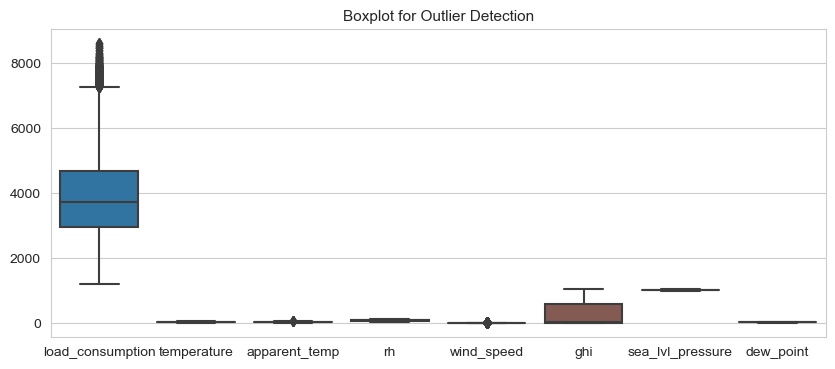

In [14]:
# 3. Boxplot Visualization
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[num_cols])
# plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection",size=11)
plt.show()

In [8]:
df.describe()

,load_consumption,temperature,apparent_temp,rh,wind_speed,ghi,sea_lvl_pressure,dew_point,holiday_flag
count,175392.000000,175392.000000,175392.000000,175392.000000,175392.000000,175392.000000,175392.000000,175392.000000,175392.000000
mean,3822.887899,24.888769,27.316937,69.541672,1.976943,271.919723,1007.519351,17.893879,0.178435
std,1265.716512,8.329090,10.838791,21.126830,1.107115,346.544898,7.476889,6.473300,0.382879
min,1186.840000,2.600000,0.600000,9.000000,0.010000,0.000000,988.000000,-4.100000,0.000000
25%,2957.800000,18.500000,18.300000,54.000000,1.220000,0.000000,1001.000000,12.600000,0.000000
50%,3709.820000,26.500000,27.200000,73.000000,2.000000,24.000000,1007.000000,17.600000,0.000000
75%,4676.670000,31.100000,36.100000,88.000000,2.510000,570.000000,1014.000000,24.300000,0.000000
max,8610.850000,45.800000,64.600000,100.000000,32.900000,1047.000000,1026.000000,33.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175392 entries, 0 to 175391
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date_time         175392 non-null  datetime64[ns]
 1   load_consumption  175392 non-null  float64       
 2   temperature       175392 non-null  float64       
 3   apparent_temp     175392 non-null  float64       
 4   rh                175392 non-null  int64         
 5   wind_speed        175392 non-null  float64       
 6   ghi               175392 non-null  int64         
 7   sea_lvl_pressure  175392 non-null  int64         
 8   dew_point         175392 non-null  float64       
 9   holiday_flag      175392 non-null  int64         
 10  weekday           175392 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 14.7+ MB


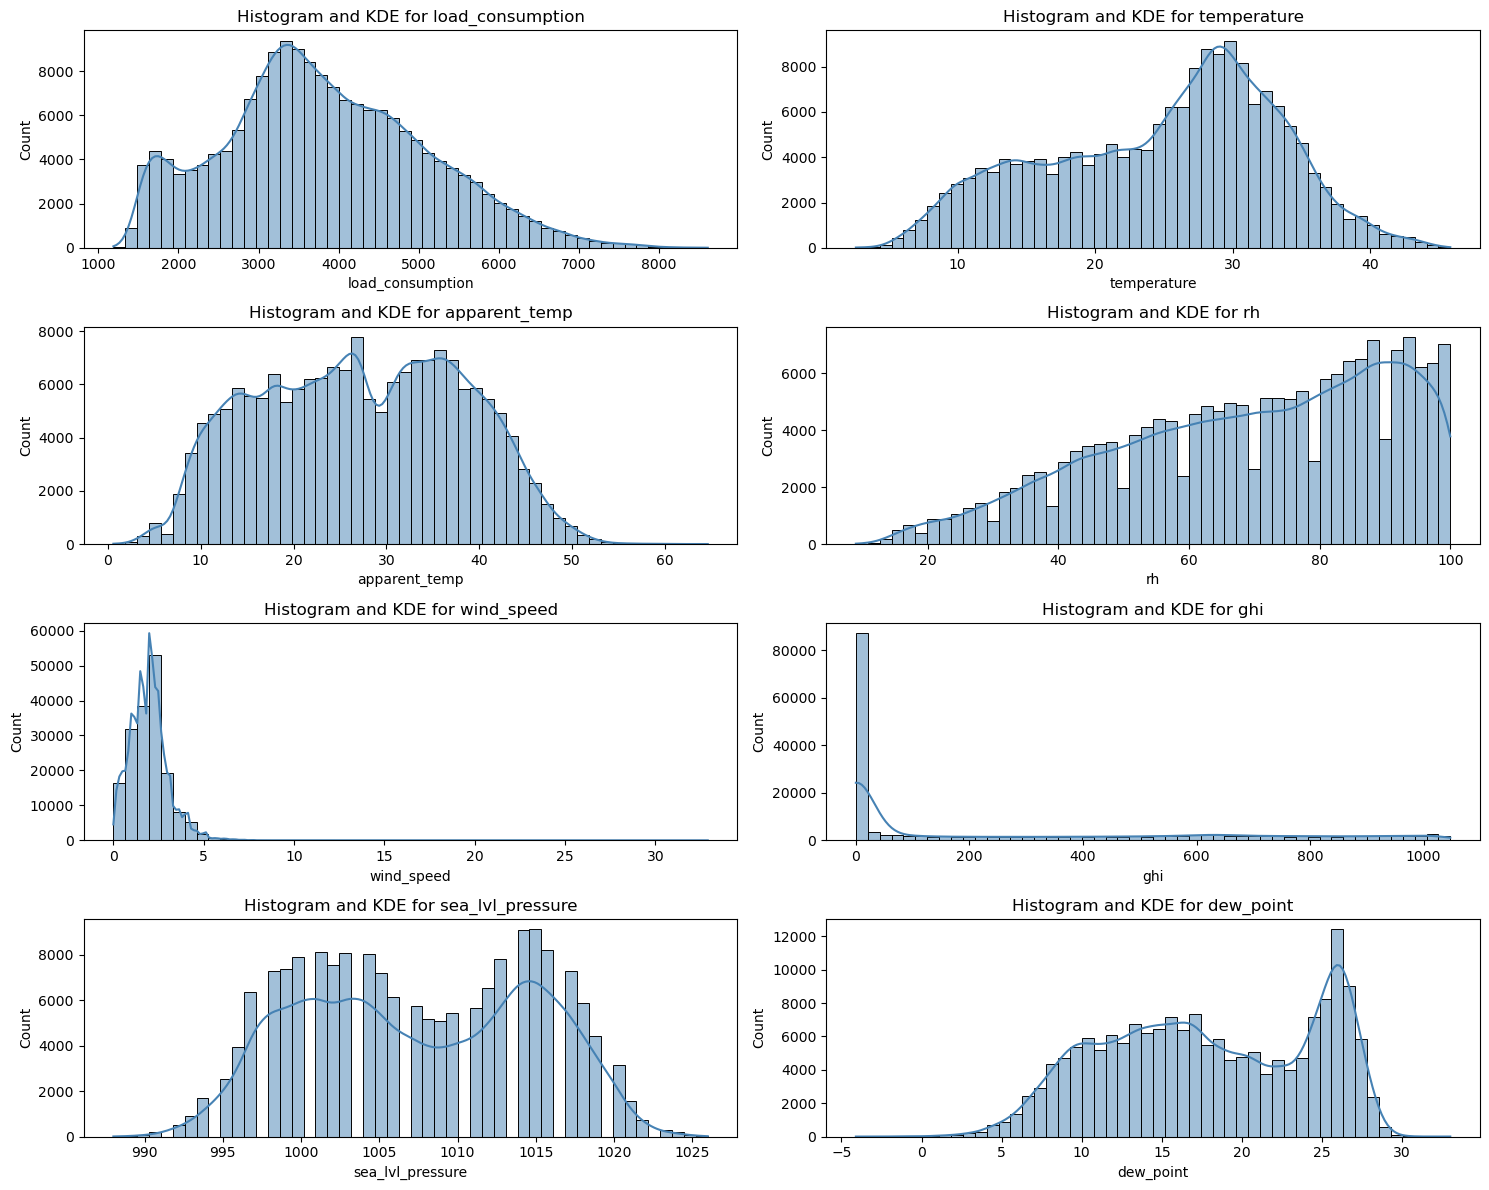

In [11]:
# Plot Histograms and KDE for each numerical feature
num_cols = ['load_consumption', 'temperature', 'apparent_temp', 'rh', 'wind_speed', 'ghi', 'sea_lvl_pressure', 'dew_point']

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(df[col], kde=True, bins=50, color='steelblue')
    plt.title(f"Histogram and KDE for {col}", fontsize=12)
plt.tight_layout()
plt.show()


### Plot trends at different levels

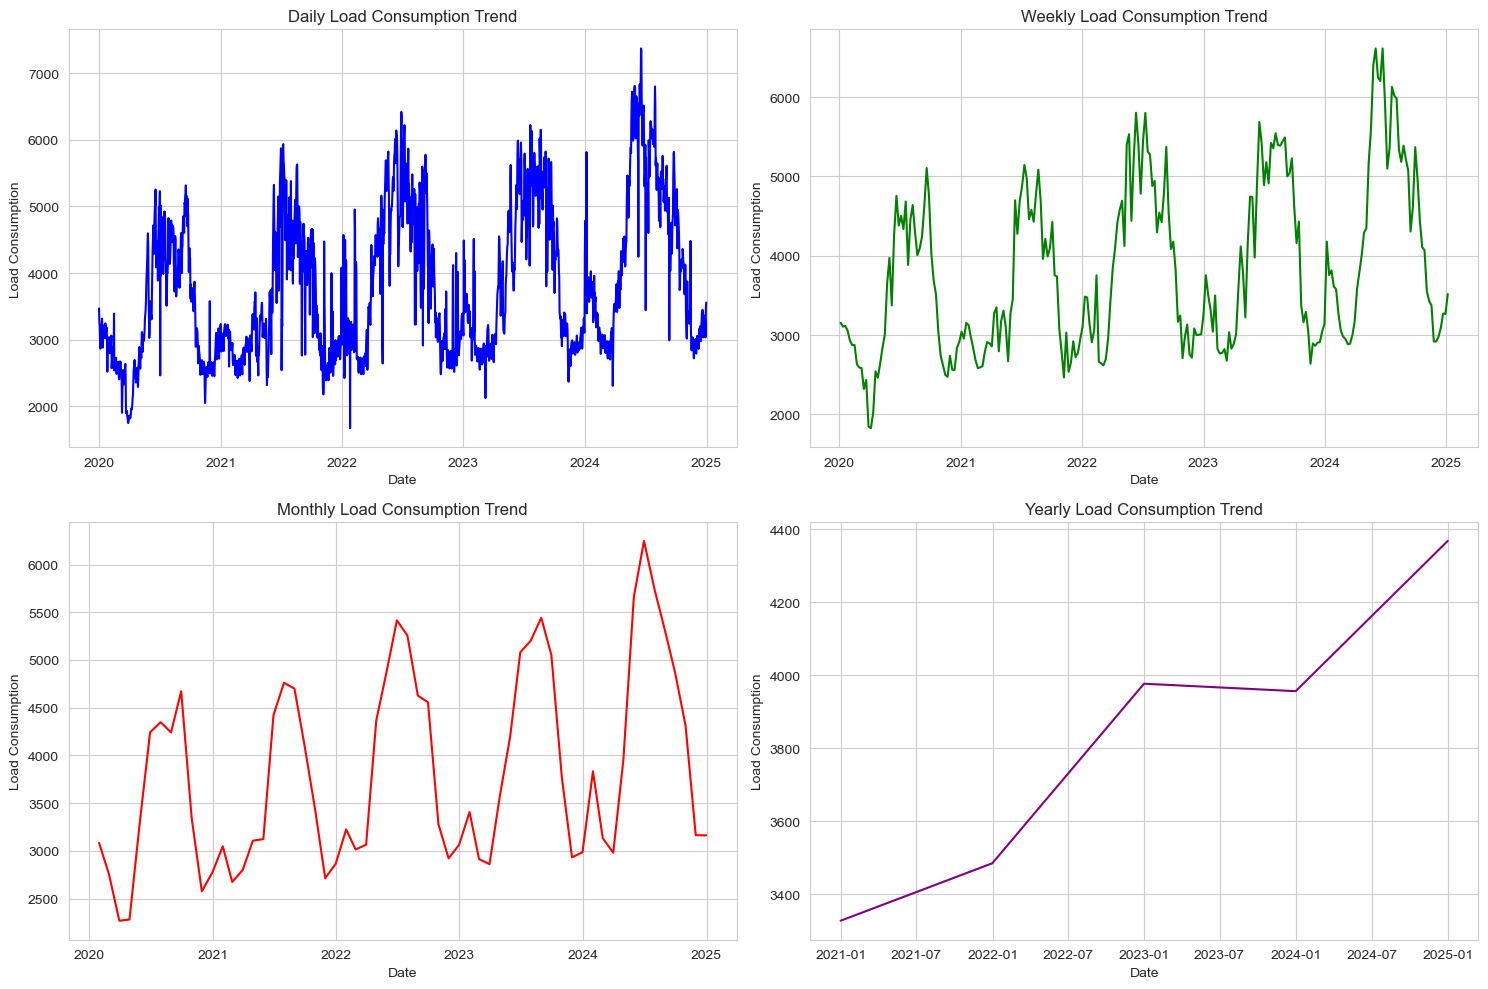

In [6]:
# Set datetime index
#df.set_index("date_time", inplace=True)

# Resampling for different time granularities
df_daily = df["load_consumption"].resample("D").mean()
df_weekly = df["load_consumption"].resample("W").mean()
df_monthly = df["load_consumption"].resample("M").mean()
df_yearly = df["load_consumption"].resample("Y").mean()

# Seaborn style
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x=df_daily.index, y=df_daily, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Daily Load Consumption Trend")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Load Consumption")

sns.lineplot(x=df_weekly.index, y=df_weekly, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Weekly Load Consumption Trend")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Load Consumption")

sns.lineplot(x=df_monthly.index, y=df_monthly, ax=axes[1, 0], color="red")
axes[1, 0].set_title("Monthly Load Consumption Trend")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Load Consumption")

sns.lineplot(x=df_yearly.index, y=df_yearly, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Yearly Load Consumption Trend")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Load Consumption")

plt.tight_layout()
plt.show()

### Hourly and Monthly Pattern Breakdown

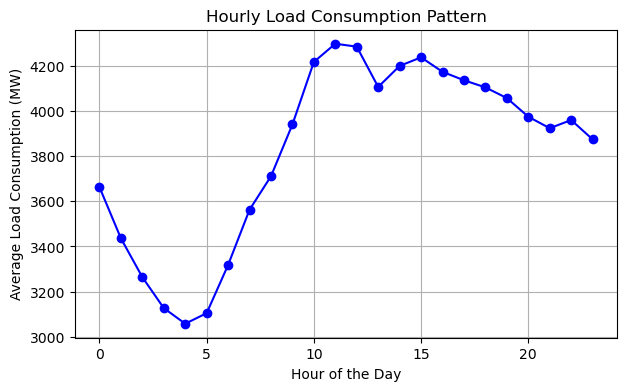

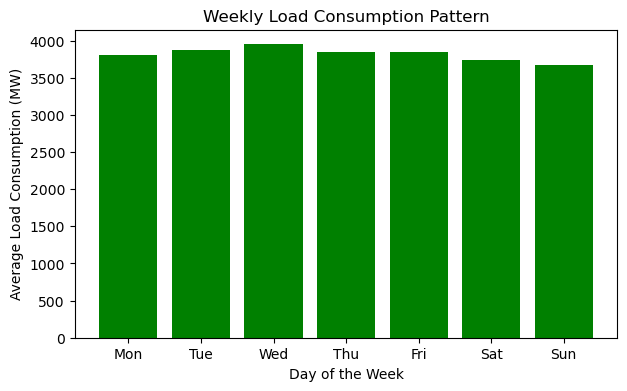

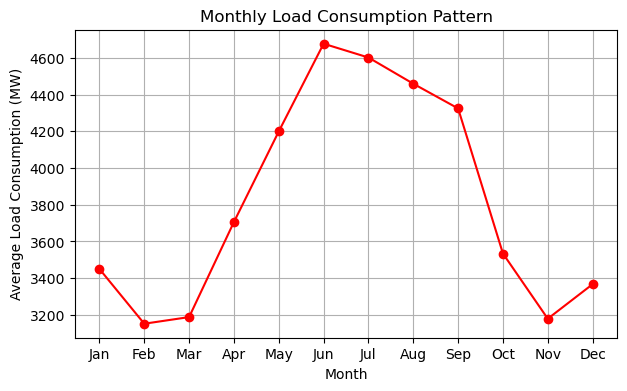

In [14]:
#Hourly Consumption Pattern (Within a Day)
df['hour'] = df.index.hour  # Extract hour from datetime index

# Group by hour and calculate mean load consumption
hourly_pattern = df.groupby('hour')['load_consumption'].mean()

# Plot hourly load pattern
plt.figure(figsize=(7, 4))
plt.plot(hourly_pattern, marker='o', linestyle='-', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Load Consumption (MW)")
plt.title("Hourly Load Consumption Pattern")
plt.grid(True)
plt.show()



#Monthly Consumption Pattern
df['month'] = df.index.month  # Extract month

# Group by month
monthly_pattern = df.groupby('month')['load_consumption'].mean()

# Plot monthly pattern
plt.figure(figsize=(7, 4))
plt.plot(monthly_pattern, marker='o', linestyle='-', color='red')
plt.xlabel("Month")
plt.ylabel("Average Load Consumption (MW)")
plt.title("Monthly Load Consumption Pattern")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Load Consumption during Holidays vs Non-holidays

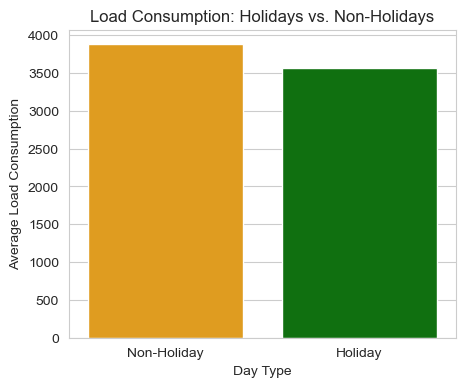

In [45]:
# Group by holiday flag and compute average load consumption
df_holiday = df.groupby("holiday_flag")["load_consumption"].mean()

# Plot comparison
plt.figure(figsize=(5, 4))
sns.barplot(x=df_holiday.index, y=df_holiday.values, palette=["orange", "green"])

plt.xticks(ticks=[0, 1], labels=["Non-Holiday", "Holiday"])
plt.title("Load Consumption: Holidays vs. Non-Holidays")
plt.xlabel("Day Type")
plt.ylabel("Average Load Consumption")
plt.show()

### Monthly Load Consumption v/s Temperature Comparison

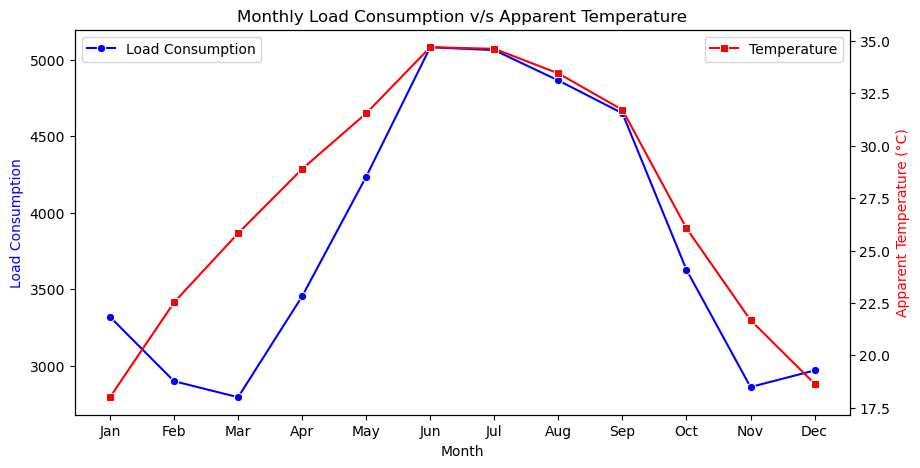

In [6]:
# Extract month from date
df.set_index("date_time", inplace=True)
df["month"] = df.index.month

# Compute monthly averages
df_monthly = df.groupby("month")[["load_consumption", "apparent_temp"]].mean()

# Dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Load Consumption Line Plot
sns.lineplot(x=df_monthly.index, y=df_monthly["load_consumption"], marker="o", ax=ax1, color="blue", label="Load Consumption")
ax1.set_ylabel("Load Consumption", color="blue")
ax1.set_xlabel("Month")
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax1.legend(loc="upper left")

# Temperature Line Plot (Secondary Axis)
ax2 = ax1.twinx()
sns.lineplot(x=df_monthly.index, y=df_monthly["apparent_temp"], marker="s", ax=ax2, color="red", label="Temperature")
ax2.set_ylabel("Apparent Temperature (°C)", color="red")
ax2.legend(loc="upper right")

plt.title("Monthly Load Consumption v/s Apparent Temperature")
plt.show()

### Correlation Heatmap

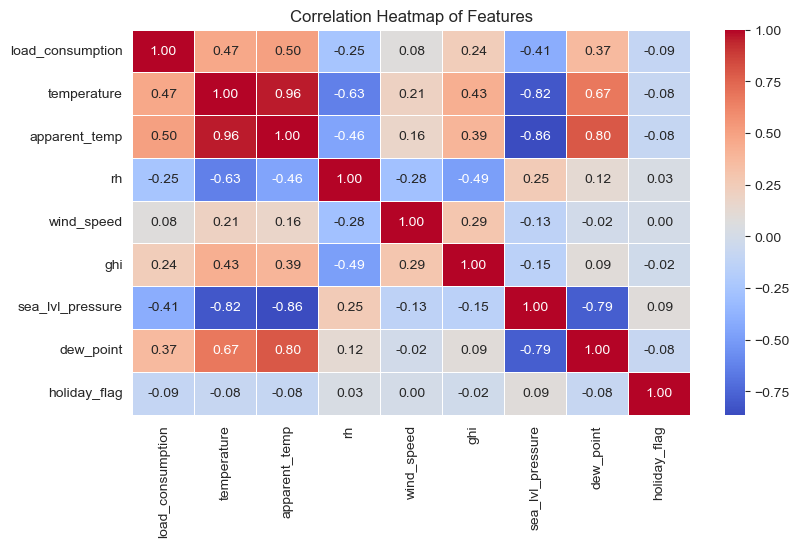

In [48]:
plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Features")
plt.show()

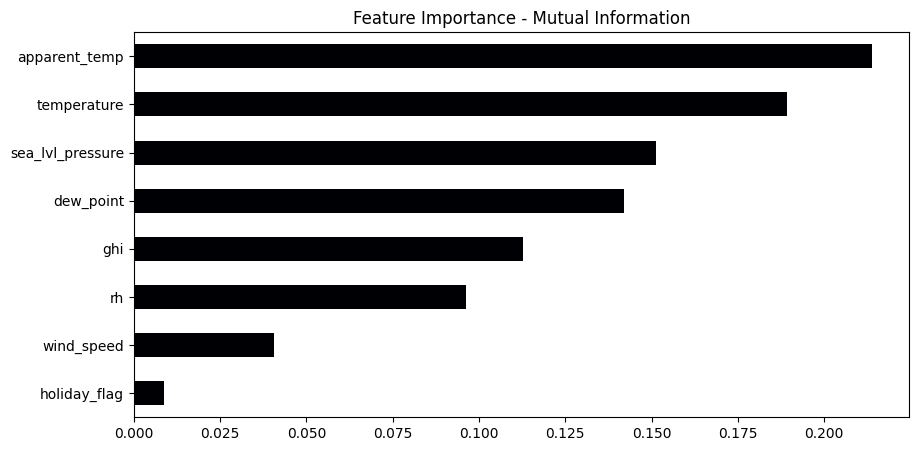

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# Define X and y
X = df.drop(columns=['load_consumption', 'date_time'])
y = df['load_consumption']
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values().plot(kind='barh', figsize=(10,5), colormap='magma')
plt.title("Feature Importance - Mutual Information")
plt.show()

In [ ]:
mi_scores

,0
temperature,0.189158
apparent_temp,0.213874
rh,0.096149
wind_speed,0.040591
ghi,0.112780
sea_lvl_pressure,0.151355
dew_point,0.142116
holiday_flag,0.008706


based on correlation and mi score holiday flag wii be dropped

In [13]:
# Load Final Merged Data
df = pd.read_csv("Delhi_Final_Merged.csv", parse_dates=['date_time'])

In [14]:
df["date_time"] = pd.to_datetime(df["date_time"], format='%d-%m-%Y %H:%M')

In [15]:
# Rename columns to match Prophet's expected format
df = df.rename(columns={"date_time": "ds", "load_consumption": "y"})

In [16]:
# Split data into training (80%) and test (20%)
split_idx = int(len(df) * 0.80)

df_train = df.iloc[:split_idx]
df_test = df.iloc[split_idx:]

print(f"Training Data: {len(df_train)}, Test Data: {len(df_test)}")

Training Data: 140313, Test Data: 35079


In [17]:
df_train

,ds,y,temperature,apparent_temp,rh,wind_speed,ghi,sea_lvl_pressure,dew_point,holiday_flag
0,2020-01-01 00:00:00,2641.720,5.3,5.4,100,0.80,0,1021,5.3,1
1,2020-01-01 00:15:00,2534.850,5.3,5.4,100,0.80,0,1021,5.3,1
2,2020-01-01 00:30:00,2429.310,5.2,5.3,100,0.80,0,1021,5.2,1
3,2020-01-01 00:45:00,2327.870,5.2,5.3,100,0.80,0,1021,5.2,1
4,2020-01-01 01:00:00,2247.980,5.1,5.2,100,0.80,0,1021,5.1,1
...,...,...,...,...,...,...,...,...,...,...
140308,2024-01-01 13:00:00,4833.085,15.0,15.0,70,2.35,622,1018,9.6,1
140309,2024-01-01 13:15:00,4730.920,15.3,15.3,68,2.39,612,1018,9.4,1
140310,2024-01-01 13:30:00,4701.725,15.5,15.5,66,2.43,602,1018,9.2,1
140311,2024-01-01 13:45:00,4782.785,15.8,15.8,65,2.47,577,1017,9.2,1


In [18]:
df_test

,ds,y,temperature,apparent_temp,rh,wind_speed,ghi,sea_lvl_pressure,dew_point,holiday_flag
140313,2024-01-01 14:15:00,4813.575,16.3,16.3,61,2.55,525,1017,8.8,1
140314,2024-01-01 14:30:00,4867.845,16.6,16.6,60,2.60,499,1017,8.8,1
140315,2024-01-01 14:45:00,4846.725,16.3,16.3,61,2.46,460,1017,8.7,1
140316,2024-01-01 15:00:00,4861.330,15.9,15.9,62,2.33,421,1017,8.7,1
140317,2024-01-01 15:15:00,4854.565,15.6,15.6,64,2.20,383,1017,8.8,1
...,...,...,...,...,...,...,...,...,...,...
175387,2024-12-31 22:45:00,3130.670,9.9,9.9,96,1.60,0,1021,9.3,1
175388,2024-12-31 23:00:00,3030.020,9.8,9.8,96,1.60,0,1021,9.2,1
175389,2024-12-31 23:15:00,2907.130,9.6,9.6,96,1.60,0,1021,9.0,1
175390,2024-12-31 23:30:00,2806.630,9.6,9.6,95,1.60,0,1020,9.7,1


###  Prophet model

In [19]:
# Initialize the Prophet model
model = Prophet()

# Add external regressors
model.add_regressor("temperature")
model.add_regressor("apparent_temp")
model.add_regressor("rh")  # Relative Humidity
model.add_regressor("wind_speed")
model.add_regressor("ghi")  # Global Horizontal Irradiance
model.add_regressor("sea_lvl_pressure")
model.add_regressor("dew_point")

# Fit the model on training data
model.fit(df_train)

12:33:55 - cmdstanpy - INFO - Chain [1] start processing
12:40:04 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# Create a future dataframe for prediction (same length as test data)
future = df_test[["ds", "temperature", "apparent_temp", "rh", "wind_speed", "ghi", "sea_lvl_pressure", "dew_point"]]

# Make predictions
forecast = model.predict(future)

In [21]:
# Ensure both DataFrames have 'ds' as datetime type
forecast["ds"] = pd.to_datetime(forecast["ds"])
df_test["ds"] = pd.to_datetime(df_test["ds"])

# Merge forecasted values with actual test data
df_test = df_test.merge(forecast[["ds", "yhat"]], on="ds", how="left")
df_test = df_test.merge(forecast[["ds", "yhat_upper"]], on="ds", how="left")
df_test = df_test.merge(forecast[["ds", "yhat_lower"]], on="ds", how="left")

# Display forecast results
df_test[["ds", "y", "yhat","yhat_upper","yhat_lower"]].head()

,ds,y,yhat,yhat_upper,yhat_lower
0,2024-01-01 14:15:00,4813.575,3882.154984,4624.811603,3170.765938
1,2024-01-01 14:30:00,4867.845,3871.985435,4634.623600,3108.584431
2,2024-01-01 14:45:00,4846.725,3869.332191,4604.796767,3100.481974
3,2024-01-01 15:00:00,4861.330,3855.103678,4591.784614,3104.185036
4,2024-01-01 15:15:00,4854.565,3834.607867,4585.170890,3056.958024


### Evaluation metrics

In [23]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_log_error

# Evaluation metrics
mae = mean_absolute_error(df_test["y"], df_test["yhat"])
mse = mean_squared_error(df_test["y"], df_test["yhat"])
rmse = np.sqrt(mean_squared_error(df_test["y"], df_test["yhat"]))
mape = np.mean(np.abs((df_test["y"] - df_test["yhat"]) / df_test["y"])) * 100
r2 = r2_score(df_test["y"], df_test["yhat"])

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

MAE: 608.24
MSE: 650382.61
RMSE: 806.46
MAPE: 14.24%
R² Score: 0.6684


### Actual v/s predicted load consumption

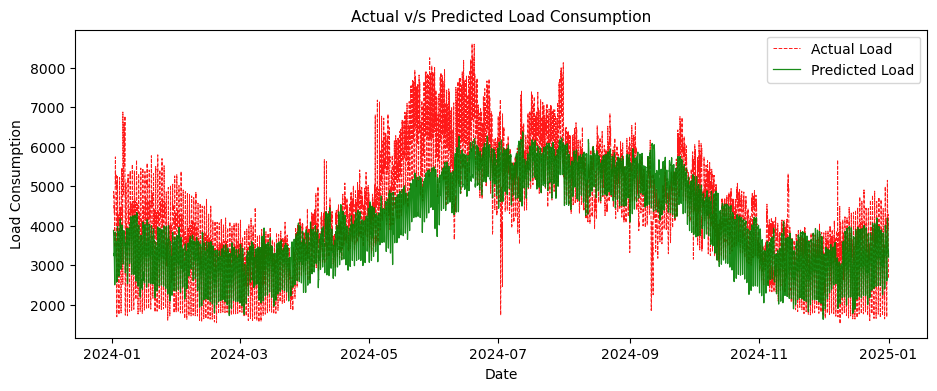

In [24]:
plt.figure(figsize=(11, 4))
sns.lineplot(data=df_test, x="ds", y="y", label="Actual Load", color="red",linestyle="dashed", linewidth=0.7, alpha=0.9)
sns.lineplot(data=df_test, x="ds", y="yhat", label="Predicted Load", color="green", linewidth=0.9, alpha=0.9)

plt.title("Actual v/s Predicted Load Consumption",size=11)
plt.xlabel("Date")
plt.ylabel("Load Consumption")
plt.legend()
plt.show()

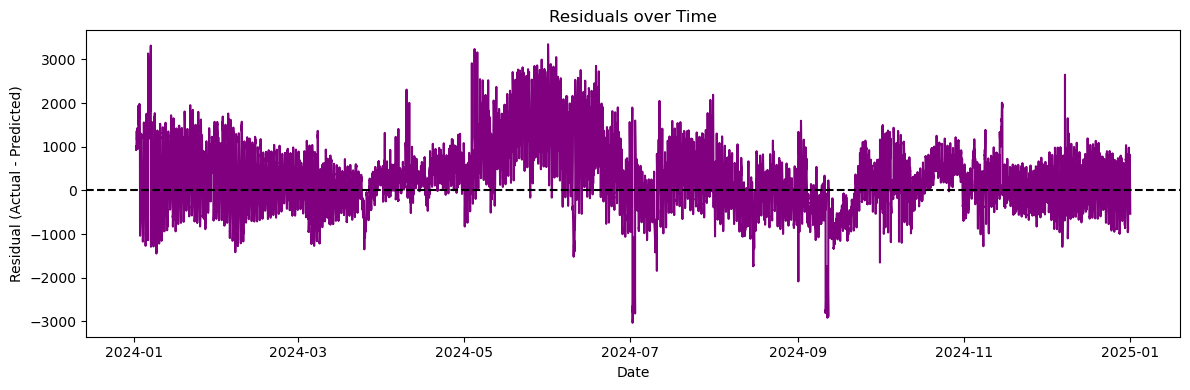

In [25]:
df_test["residual"] = df_test["y"] - df_test["yhat"]

plt.figure(figsize=(12, 4))
sns.lineplot(data=df_test, x="ds", y="residual", color="purple")
plt.axhline(0, linestyle="--", color="black")
plt.title("Residuals over Time")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()

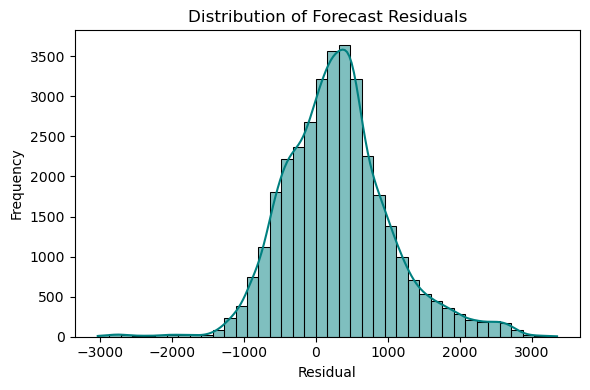

In [26]:
plt.figure(figsize=(6, 4))
sns.histplot(df_test["residual"], kde=True, color="teal", bins=40)
plt.title("Distribution of Forecast Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Prophet seasonality components

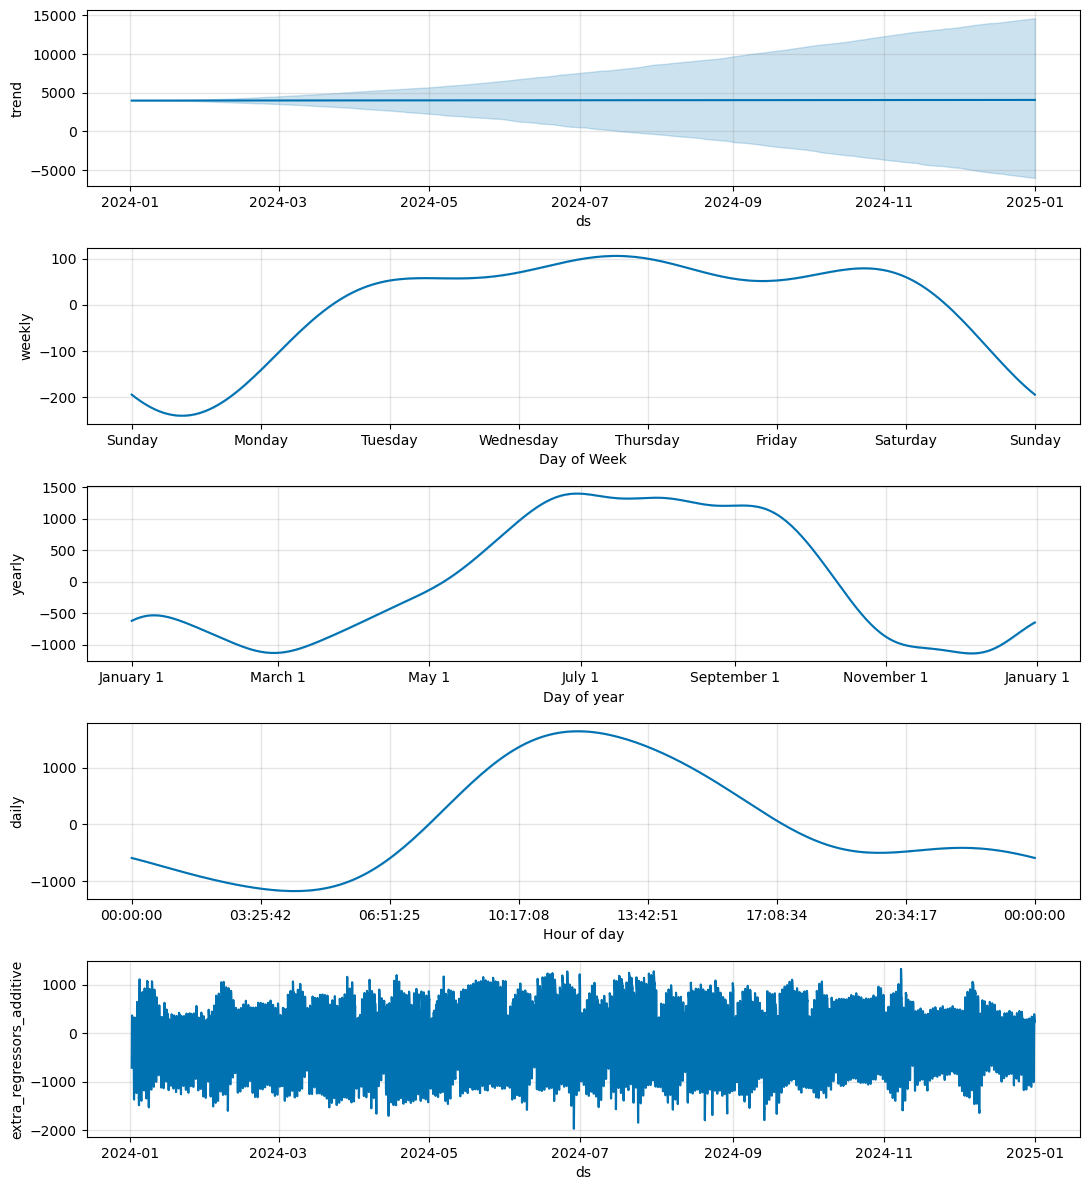

In [28]:
# Prophet’s built-in plot_components
model.plot_components(forecast, figsize=(11, 12))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Stacked Two Layer LSTM

In [ ]:
# Convert datetime and set index
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
df.set_index('date_time', inplace=True)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Convert datetime and set index
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
df.set_index('date_time', inplace=True)

# Feature Selection
features = ['load_consumption', 'temperature', 'apparent_temp', 'rh', 'wind_speed', 'ghi', 'sea_lvl_pressure', 'dew_point']

# Feature Engineering: Extract Time Features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
features += ['hour', 'day', 'month']

# Normalize Data with StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features, index=df.index)

# Splitting Data (60% Train, 20% Val, 20% Test)
train_size = int(0.6 * len(df_scaled))
val_size = int(0.2 * len(df_scaled))
test_size = len(df_scaled) - train_size - val_size

train = df_scaled.iloc[:train_size]
val = df_scaled.iloc[train_size:train_size+val_size]
test = df_scaled.iloc[train_size+val_size:]

# Sequence Length (48 timesteps = 12 hours of 15-min intervals)
SEQ_LENGTH = 48

def create_sequences(data, target_col, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data.iloc[i+seq_length][target_col])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train, 'load_consumption', SEQ_LENGTH)
X_val, y_val = create_sequences(val, 'load_consumption', SEQ_LENGTH)
X_test, y_test = create_sequences(test, 'load_consumption', SEQ_LENGTH)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (105187, 48, 11), Val: (35030, 48, 11), Test: (35031, 48, 11)


In [ ]:

# Define Two-Layer Stacked LSTM Model (Baseline)
model = Sequential([
    LSTM(128, return_sequences=True, activation='relu', dropout=0.3, input_shape=(SEQ_LENGTH, len(features))),
    BatchNormalization(),

    LSTM(64, activation='relu', dropout=0.3),
    BatchNormalization(),

    Dense(32, activation='relu'),
    Dense(1)
])

# Compile Model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

# Model Saving Path
model_save_path = "stack_lstm_model.keras"

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath=model_save_path, monitor='val_loss', save_best_only=True, verbose=1)
]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 48, 128)             │          71,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 48, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,969 (484.25 KB)

 Trainable params: 123,585 (482.75 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=128, callbacks=callbacks, verbose=1)


Epoch 1/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7871 - mae: 0.6959
Epoch 1: val_loss improved from inf to 0.78376, saving model to stack_lstm_model.keras
822/822 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - loss: 0.7870 - mae: 0.6958 - val_loss: 0.7838 - val_mae: 0.7046 - learning_rate: 0.0010
Epoch 2/100
819/822 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6354 - mae: 0.6274
Epoch 2: val_loss improved from 0.78376 to 0.59751, saving model to stack_lstm_model.keras
822/822 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - loss: 0.6352 - mae: 0.6273 - val_loss: 0.5975 - val_mae: 0.6198 - learning_rate: 0.0010
Epoch 3/100
821/822 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5482 - mae: 0.5766
Epoch 3: val_loss improved from 0.59751 to 0.42328, saving model to stack_lstm_model.keras
822/822 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.5481 - mae: 0.5766 - val_loss: 0.4233 - val_mae: 0.5229 - learning_rate: 0.0010
Epoch 4/100
820/822 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4755 - mae: 0.5303


In [ ]:
import pickle
with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [ ]:
def evaluate_model(model, X, y, dataset_type):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"\n{dataset_type} Metrics")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}, R² Score: {r2:.4f}")

    return predictions

# Evaluate & Store Predictions
train_preds = evaluate_model(model, X_train, y_train, "Train")
val_preds = evaluate_model(model, X_val, y_val, "Validation")
test_preds = evaluate_model(model, X_test, y_test, "Test")

3288/3288 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step

Train Metrics
MAE: 0.3610, MSE: 0.2193, RMSE: 0.4683, MAPE: 4.2126, R² Score: 0.7405
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step

Validation Metrics
MAE: 0.3894, MSE: 0.2387, RMSE: 0.4885, MAPE: 7.6836, R² Score: 0.7478
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step

Test Metrics
MAE: 0.4784, MSE: 0.3598, RMSE: 0.5999, MAPE: 3.0185, R² Score: 0.7063


In [ ]:
# Save the scaler for later use
import joblib
joblib.dump(scaler, "scaler.pkl")
# Load the saved scaler
scaler = joblib.load("scaler.pkl")

# Create a dummy dataframe to inverse transform only 'load_consumption'
def inverse_transform(preds_scaled, actual_scaled, feature_name='load_consumption'):
    dummy = np.zeros((len(preds_scaled), len(features)))
    dummy[:, features.index(feature_name)] = preds_scaled.flatten()
    inv_preds = scaler.inverse_transform(dummy)[:, features.index(feature_name)]

    dummy[:, features.index(feature_name)] = actual_scaled.flatten()
    inv_actuals = scaler.inverse_transform(dummy)[:, features.index(feature_name)]

    return inv_actuals, inv_preds

inv_y_test, inv_test_preds = inverse_transform(test_preds, y_test)

In [ ]:
# Define Evaluation Function
def evaluate_model(model, X, y_scaled, dataset_type):

    # Get Predictions
    preds_scaled = model.predict(X)

    # Inverse Transform to Original Scale
    inv_y, inv_preds = inverse_transform(preds_scaled, y_scaled)

    # Compute Metrics
    mae = mean_absolute_error(inv_y, inv_preds)
    mse = mean_squared_error(inv_y, inv_preds)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(inv_y, inv_preds)
    smape = np.mean(2 * np.abs(inv_y - inv_preds) / (np.abs(inv_y) + np.abs(inv_preds))) * 100
    r2 = r2_score(inv_y, inv_preds)

    print(f"\n{dataset_type} Metrics (Original Scale):")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}, SMAPE: {smape:.4f}, R² Score: {r2:.4f}")

    return inv_y, inv_preds

# Evaluate & Store Predictions
inv_y_train, inv_train_preds = evaluate_model(model, X_train, y_train, "Train")
inv_y_val, inv_val_preds = evaluate_model(model, X_val, y_val, "Validation")
inv_y_test, inv_test_preds = evaluate_model(model, X_test, y_test, "Test")

3288/3288 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step

Train Metrics (Original Scale):
MAE: 456.9186, MSE: 351378.1071, RMSE: 592.7715
MAPE: 0.1555, SMAPE: 14.1127, R² Score: 0.7405
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step

Validation Metrics (Original Scale):
MAE: 492.8070, MSE: 382324.6933, RMSE: 618.3241
MAPE: 0.1367, SMAPE: 13.2684, R² Score: 0.7478
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step

Test Metrics (Original Scale):
MAE: 605.4780, MSE: 576455.6120, RMSE: 759.2467
MAPE: 0.1445, SMAPE: 14.5727, R² Score: 0.7063


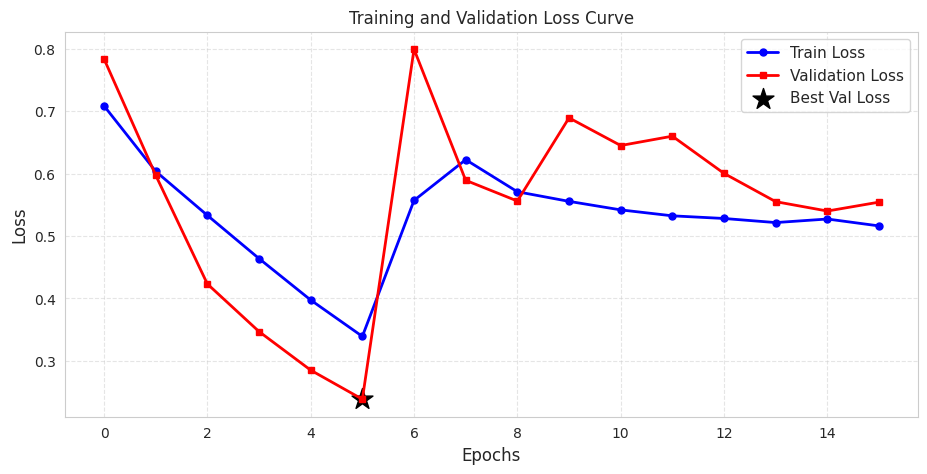

In [ ]:
# Plot Training Loss Curve

print("\n")
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")
plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2, marker='o', markersize=5)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2, marker='s', markersize=5)

# Highlight Best Epoch
best_epoch = np.argmin(history.history['val_loss'])
plt.scatter(best_epoch, history.history['val_loss'][best_epoch], color='black', marker='*', s=250, label="Best Val Loss")

# Titles & Labels
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title("Training and Validation Loss Curve", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

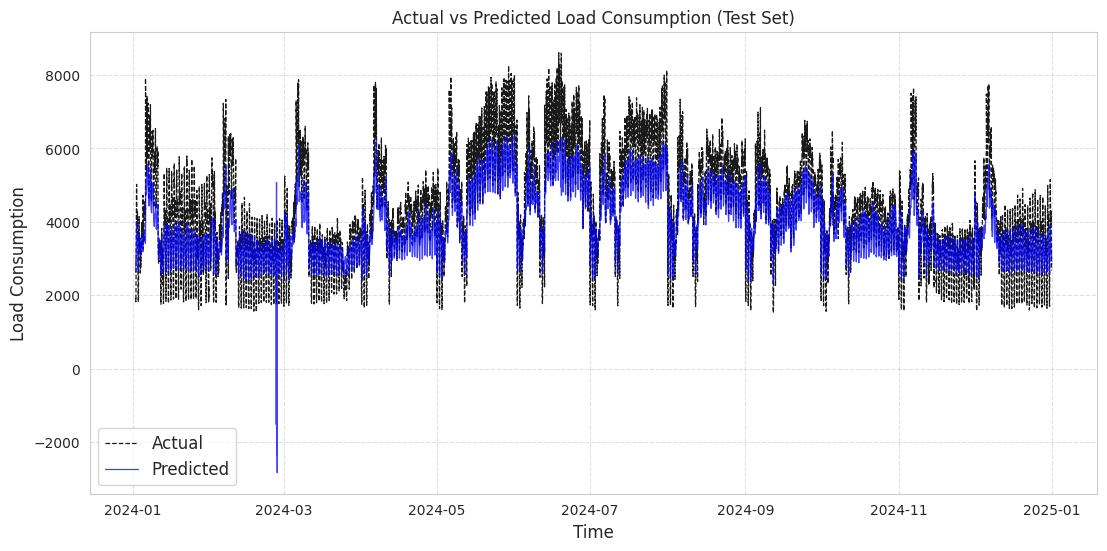

In [ ]:
# Ensure inv_y_test has a corresponding time index
time_index = df.index[-len(inv_y_test):]  # Adjust based on your data
print("\n")
plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")

# Actual vs Predicted with proper time indexing
plt.plot(time_index, inv_y_test, label="Actual", color="black", linestyle="dashed", linewidth=0.9, alpha=0.9)
plt.plot(time_index, inv_test_preds, label="Predicted", color="blue", linewidth=0.9, alpha=0.75)

# Titles and Labels
plt.title("Actual vs Predicted Load Consumption (Test Set)", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Load Consumption", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

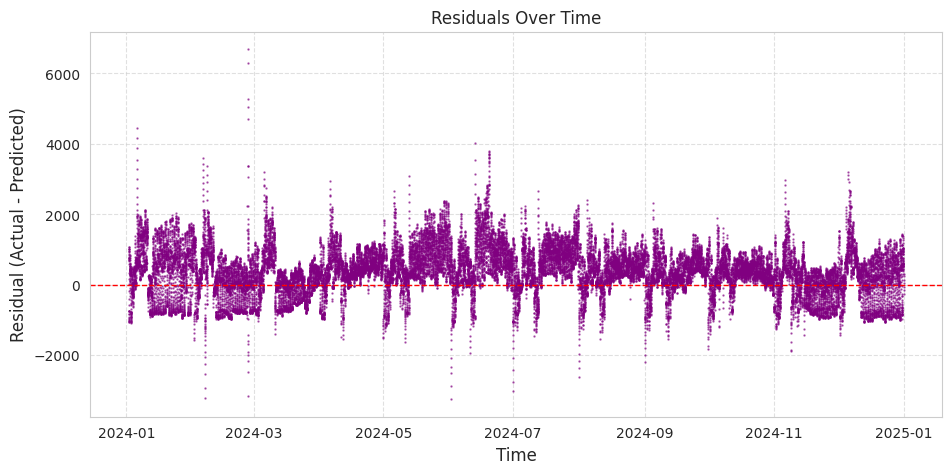

In [ ]:
# Calculate Residuals
residuals = inv_y_test - inv_test_preds

# 1. Residual Plot (Residuals vs Time)
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")

plt.plot(time_index, residuals, marker='o', ms=0.7, linestyle='None', alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)

# Titles & Labels
plt.title("Residuals Over Time", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Residual (Actual - Predicted)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Stacked Two Layer BiLSTM with Unidirectional LSTM

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Convert datetime and set index
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
df.set_index('date_time', inplace=True)

# Feature Selection
features = ['load_consumption', 'temperature', 'apparent_temp', 'rh', 'wind_speed', 'ghi', 'sea_lvl_pressure', 'dew_point']

# Feature Engineering: Extract Time Features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
features += ['hour', 'day', 'month']

# Normalize Data with StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features, index=df.index)

# Splitting Data (60% Train, 20% Val, 20% Test)
train_size = int(0.6 * len(df_scaled))
val_size = int(0.2 * len(df_scaled))
test_size = len(df_scaled) - train_size - val_size

train = df_scaled.iloc[:train_size]
val = df_scaled.iloc[train_size:train_size+val_size]
test = df_scaled.iloc[train_size+val_size:]

# Sequence Length (96 timesteps = 24 hours of 15-min intervals)
SEQ_LENGTH = 96

def create_sequences(data, target_col, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data.iloc[i+seq_length][target_col])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train, 'load_consumption', SEQ_LENGTH)
X_val, y_val = create_sequences(val, 'load_consumption', SEQ_LENGTH)
X_test, y_test = create_sequences(test, 'load_consumption', SEQ_LENGTH)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (105139, 96, 11), Val: (34982, 96, 11), Test: (34983, 96, 11)


In [5]:

# Define Optimized LSTM Model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh', dropout=0.3), input_shape=(SEQ_LENGTH, len(features))),
    BatchNormalization(),

    Bidirectional(LSTM(64, return_sequences=True, activation='tanh', dropout=0.3)),
    BatchNormalization(),

    LSTM(32, activation='tanh', dropout=0.2),

    Dense(32, activation='tanh'),
    Dense(1)
])

# Compile Model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

# Model Saving Path
model_save_path = "best_lstm_model.keras"

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath=model_save_path, monitor='val_loss', save_best_only=True, verbose=1)
]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 96, 256)             │         143,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 96, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 96, 128)             │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 96, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 330,945 (1.26 MB)

 Trainable params: 330,177 (1.26 MB)

 Non-trainable params: 768 (3.00 KB)

In [6]:
# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=128, callbacks=callbacks, verbose=1)


Epoch 1/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2172 - mae: 0.3274
Epoch 1: val_loss improved from inf to 0.09201, saving model to best_lstm_model.keras
822/822 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - loss: 0.2172 - mae: 0.3274 - val_loss: 0.0920 - val_mae: 0.1895 - learning_rate: 0.0010
Epoch 2/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0866 - mae: 0.1703
Epoch 2: val_loss improved from 0.09201 to 0.08185, saving model to best_lstm_model.keras
822/822 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - loss: 0.0866 - mae: 0.1702 - val_loss: 0.0819 - val_mae: 0.1551 - learning_rate: 0.0010
Epoch 3/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0719 - mae: 0.1447
Epoch 3: val_loss improved from 0.08185 to 0.07067, saving model to best_lstm_model.keras
822/822 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - loss: 0.0719 - mae: 0.1447 - val_loss: 0.0707 - val_mae: 0.1328 - learning_rate: 0.0010
Epoch 4/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0644 - mae: 0.1319
Epo

In [7]:
import pickle
with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [ ]:
# Save Model
model.save(model_save_path)

# Load Best Model (if needed later)
model = load_model("best_lstm_model.keras", compile=False)

In [8]:
def evaluate_model(model, X, y, dataset_type):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"\n{dataset_type} Metrics")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}, R² Score: {r2:.4f}")

    return predictions

# Evaluate Predictions
train_preds = evaluate_model(model, X_train, y_train, "Train")
val_preds = evaluate_model(model, X_val, y_val, "Validation")
test_preds = evaluate_model(model, X_test, y_test, "Test")

3286/3286 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step

Train Metrics
MAE: 0.0850, MSE: 0.0406, RMSE: 0.2014, MAPE: 0.9448, R² Score: 0.9520
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step

Validation Metrics
MAE: 0.0922, MSE: 0.0428, RMSE: 0.2069, MAPE: 1.0645, R² Score: 0.9548
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step

Test Metrics
MAE: 0.1201, MSE: 0.0749, RMSE: 0.2737, MAPE: 0.5011, R² Score: 0.9388


In [10]:
# Save the scaler for later use
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [11]:
# Load the saved scaler
scaler = joblib.load("scaler.pkl")

# Create a dummy dataframe to inverse transform only 'load_consumption'
def inverse_transform(preds_scaled, actual_scaled, feature_name='load_consumption'):
    dummy = np.zeros((len(preds_scaled), len(features)))
    dummy[:, features.index(feature_name)] = preds_scaled.flatten()
    inv_preds = scaler.inverse_transform(dummy)[:, features.index(feature_name)]

    dummy[:, features.index(feature_name)] = actual_scaled.flatten()
    inv_actuals = scaler.inverse_transform(dummy)[:, features.index(feature_name)]

    return inv_actuals, inv_preds

inv_y_test, inv_test_preds = inverse_transform(test_preds, y_test)

In [12]:
# Define Evaluation Function
def evaluate_model(model, X, y_scaled, dataset_type):

    # Get Predictions
    preds_scaled = model.predict(X)

    # Inverse Transform to Original Scale
    inv_y, inv_preds = inverse_transform(preds_scaled, y_scaled)

    # Compute Metrics
    mae = mean_absolute_error(inv_y, inv_preds)
    mse = mean_squared_error(inv_y, inv_preds)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(inv_y, inv_preds)
    smape = np.mean(2 * np.abs(inv_y - inv_preds) / (np.abs(inv_y) + np.abs(inv_preds))) * 100
    r2 = r2_score(inv_y, inv_preds)

    print(f"\n{dataset_type} Metrics (Original Scale):")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}, SMAPE: {smape:.4f}, R² Score: {r2:.4f}")

    return inv_y, inv_preds

# Evaluate Predictions to original scale
inv_y_train, inv_train_preds = evaluate_model(model, X_train, y_train, "Train")
inv_y_val, inv_val_preds = evaluate_model(model, X_val, y_val, "Validation")
inv_y_test, inv_test_preds = evaluate_model(model, X_test, y_test, "Test")

3286/3286 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step

Train Metrics (Original Scale):
MAE: 108.9026, MSE: 66638.6659, RMSE: 258.1447
MAPE: 0.0334, SMAPE: 3.1944, R² Score: 0.9508
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step

Validation Metrics (Original Scale):
MAE: 113.6946, MSE: 64121.4777, RMSE: 253.2222
MAPE: 0.0298, SMAPE: 3.0178, R² Score: 0.9577
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step

Test Metrics (Original Scale):
MAE: 154.1843, MSE: 123929.7969, RMSE: 352.0366
MAPE: 0.0345, SMAPE: 3.5842, R² Score: 0.9368


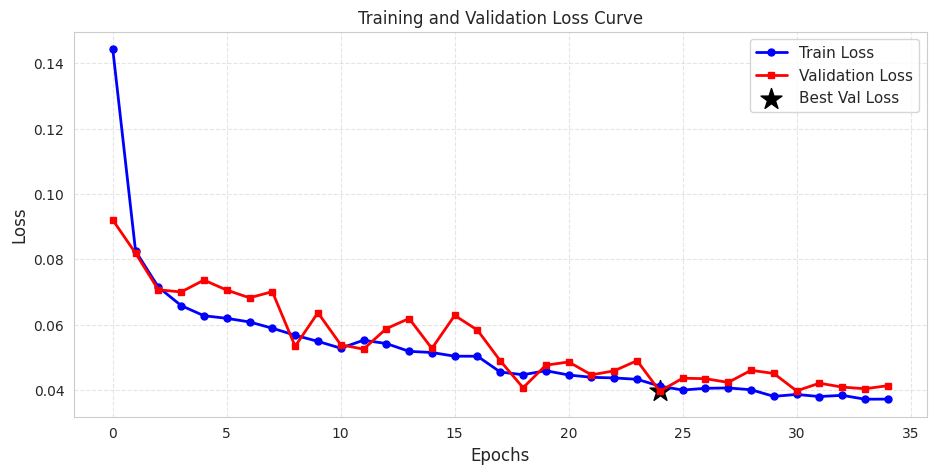

In [78]:
# Plot Training Loss Curve

print("\n")
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")
plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2, marker='o', markersize=5)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2, marker='s', markersize=5)

# Highlight Best Epoch
best_epoch = np.argmin(history.history['val_loss'])
plt.scatter(best_epoch, history.history['val_loss'][best_epoch], color='black', marker='*', s=250, label="Best Val Loss")

# Titles & Labels
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title("Training and Validation Loss Curve", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

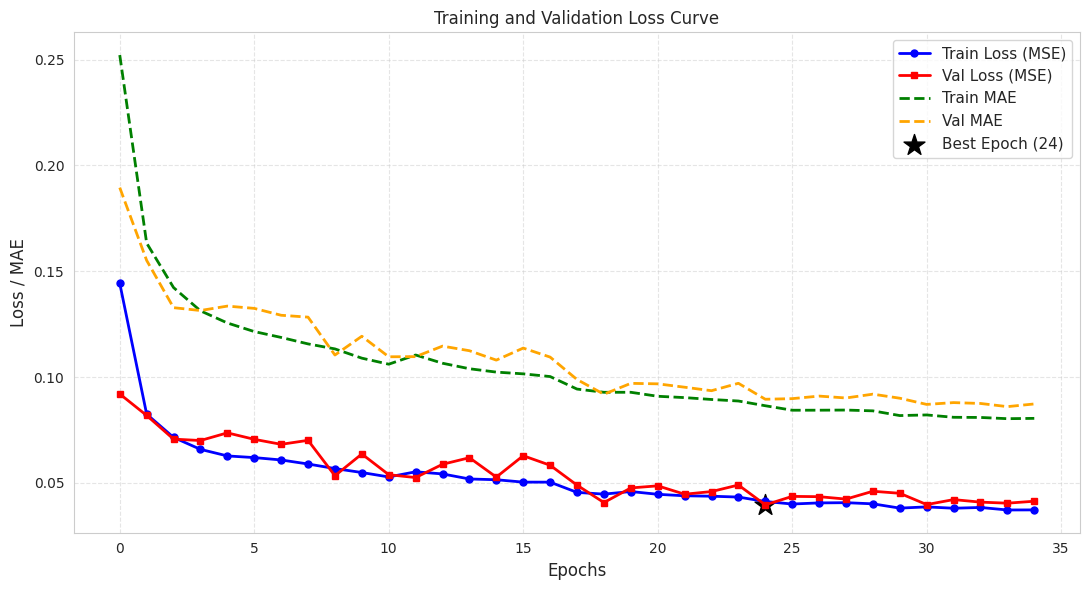

In [79]:

plt.figure(figsize=(11, 6))
sns.set_style("whitegrid")

# Loss Curves
plt.plot(history.history['loss'], label='Train Loss (MSE)', color='blue', linewidth=2, marker='o', markersize=5)
plt.plot(history.history['val_loss'], label='Val Loss (MSE)', color='red', linewidth=2, marker='s', markersize=5)

# MAE Curves
if 'mae' in history.history:
    plt.plot(history.history['mae'], label='Train MAE', color='green', linewidth=2, linestyle='dashed')
if 'val_mae' in history.history:
    plt.plot(history.history['val_mae'], label='Val MAE', color='orange', linewidth=2, linestyle='dashed')

# Highlight Best Validation Epoch
best_epoch = np.argmin(history.history['val_loss'])
best_val_loss = history.history['val_loss'][best_epoch]
plt.scatter(best_epoch, best_val_loss, color='black', marker='*', s=250, label=f"Best Epoch ({best_epoch})")

# Titles & Labels
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss / MAE', fontsize=12)
plt.title("Training and Validation Loss Curve", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

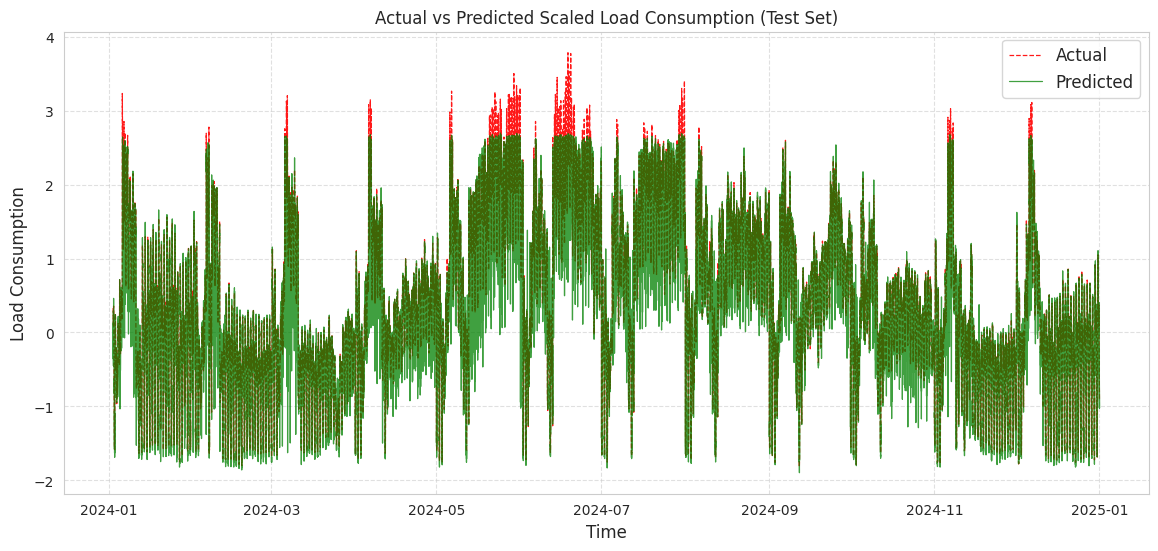

In [77]:
# Ensure y_test has a corresponding time index
time_index = df.index[-len(y_test):]  # Adjust based on your data

plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Actual vs Predicted with proper time indexing
plt.plot(time_index, y_test, label="Actual", color="red", linestyle="dashed", linewidth=0.9, alpha=0.9)
plt.plot(time_index, test_preds, label="Predicted", color="green", linewidth=0.9, alpha=0.75)

# Titles and Labels
plt.title("Actual vs Predicted Scaled Load Consumption (Test Set)", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Load Consumption", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

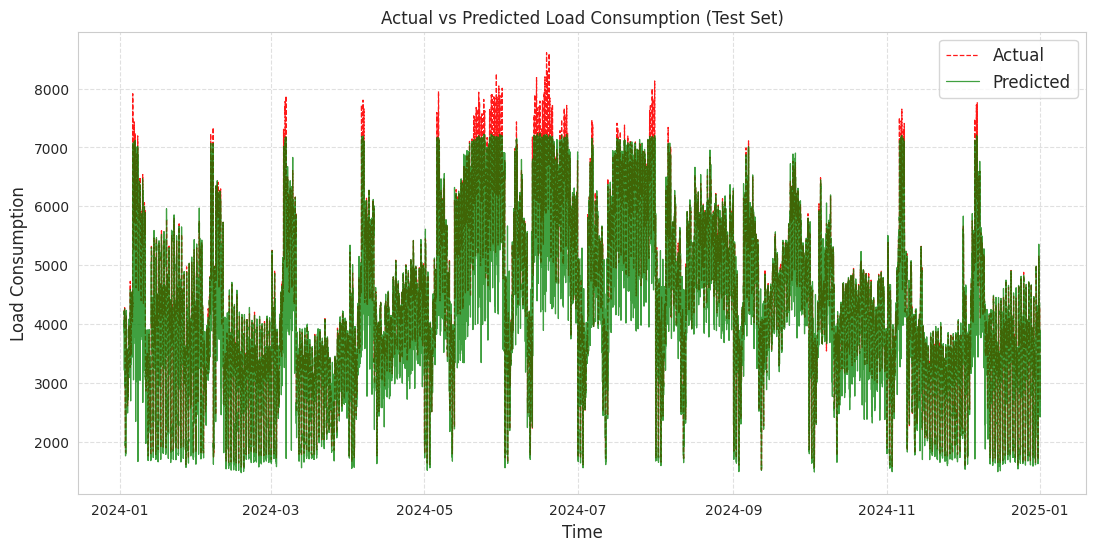

In [74]:
# Ensure inv_y_test has a corresponding time index
time_index = df.index[-len(inv_y_test):]  # Adjust based on your data
print("\n")
plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")

# Actual vs Predicted with proper time indexing
plt.plot(time_index, inv_y_test, label="Actual", color="red", linestyle="dashed", linewidth=0.9, alpha=0.9)
plt.plot(time_index, inv_test_preds, label="Predicted", color="green", linewidth=0.9, alpha=0.75)

# Titles and Labels
plt.title("Actual vs Predicted Load Consumption (Test Set)", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Load Consumption", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

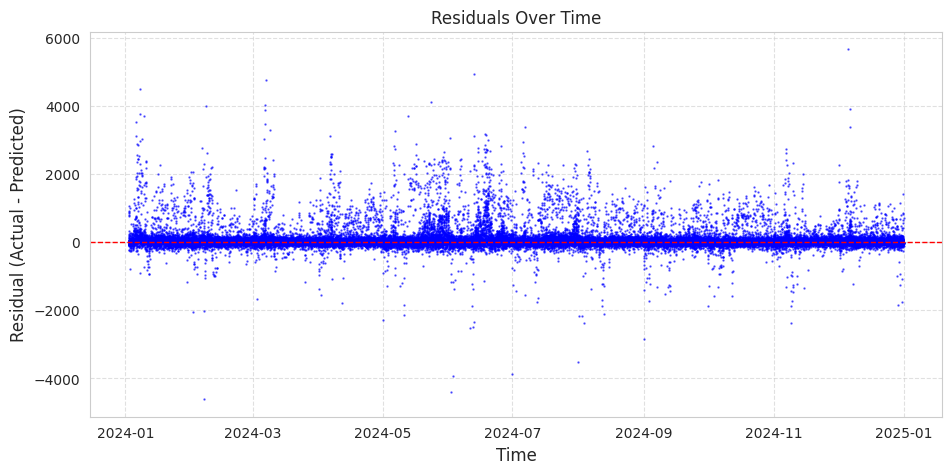

In [27]:
# Calculate Residuals
residuals = inv_y_test - inv_test_preds

# 1. Residual Plot (Residuals vs Time)
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")

plt.plot(time_index, residuals, marker='o', ms=0.7, linestyle='None', alpha=0.6, color='blue')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)

# Titles & Labels
plt.title("Residuals Over Time", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Residual (Actual - Predicted)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

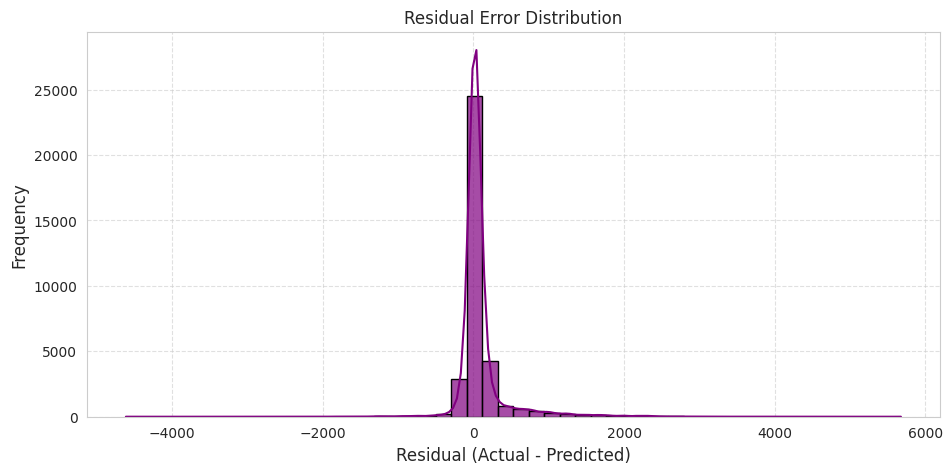

In [29]:
# 2. Error Distribution (Histogram + KDE)
plt.figure(figsize=(11, 5))
sns.histplot(residuals, bins=50, kde=True, color="purple", edgecolor="black", alpha=0.7)

# Titles & Labels
plt.title("Residual Error Distribution", fontsize=12)
plt.xlabel("Residual (Actual - Predicted)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [35]:
# Save Train, Val, Test Predictions
train_results_df = pd.DataFrame({'actual': inv_y_train, 'predicted': inv_train_preds})
train_results_df.to_csv("train_predictions.csv", index=False)

val_results_df = pd.DataFrame({'actual': inv_y_val, 'predicted': inv_val_preds})
val_results_df.to_csv("val_predictions.csv", index=False)

test_results_df = pd.DataFrame({'actual': inv_y_test, 'predicted': inv_test_preds})
test_results_df.to_csv("test_predictions.csv", index=False)

print("Train, Validation, Test Predictions saved")

# Save Evaluation Metrics
metrics_dict = {
    "train_original": {
        "MAE": 108.9026,
        "MSE": 66638.6659,
        "RMSE": 258.1447,
        "MAPE": 0.0334,
        "SMAPE": 3.1944,
        "R2": 0.9508
    },
    "validation_original": {
        "MAE": 113.6946,
        "MSE": 64121.4777,
        "RMSE": 253.2222,
        "MAPE": 0.0298,
        "SMAPE": 3.0178,
        "R2": 0.9577
    },
    "test_original": {
        "MAE": 154.1843,
        "MSE": 123929.7969,
        "RMSE": 352.0366,
        "MAPE": 0.0345,
        "SMAPE": 3.5842,
        "R2": 0.9368
    },
    "train_scaled": {
        "MAE": 0.0850,
        "MSE": 0.0406,
        "RMSE": 0.2014,
        "MAPE": 0.9448,
        "R2": 0.9520
    },
    "validation_scaled": {
        "MAE": 0.0922,
        "MSE": 0.0428,
        "RMSE": 0.2069,
        "MAPE": 1.0645,
        "R2": 0.9548
    },
    "test_scaled": {
        "MAE": 0.1201,
        "MSE": 0.0749,
        "RMSE": 0.2737,
        "MAPE": 0.5011,
        "R2": 0.9388
    }
}

import json

with open("evaluation_metrics.json", "w") as f:
    json.dump(metrics_dict, f, indent=4)

print("Metrics saved to evaluation_metrics.json")

Train, Validation, Test Predictions saved
Metrics saved to evaluation_metrics.json


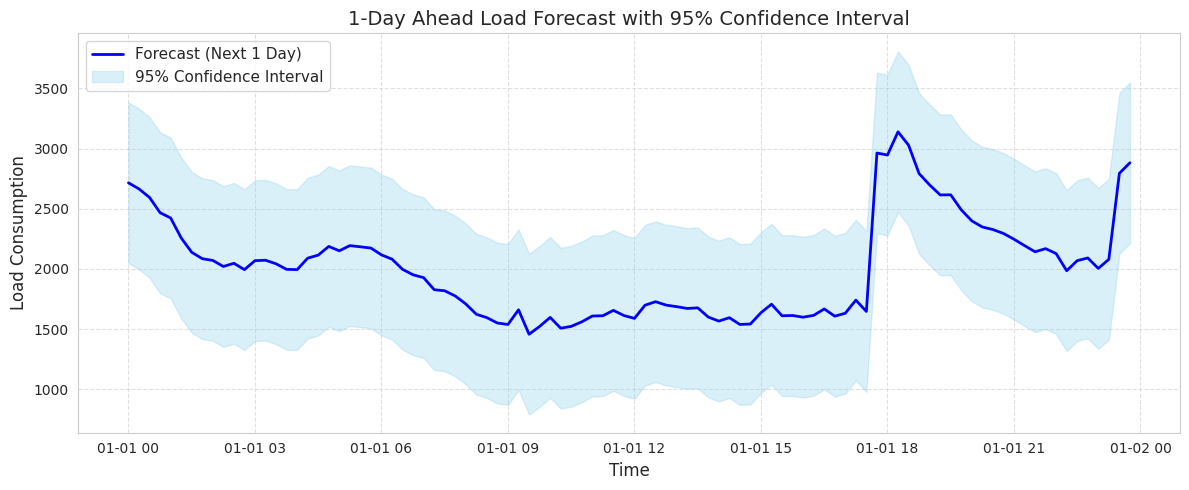

In [52]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")

# Plot forecasted values
plt.plot(forecast_df['date_time'], short_term_forecast, label="Forecast (Next 1 Day)", color="blue", linewidth=2)

# Confidence Interval
plt.fill_between(
    forecast_df['date_time'],
    short_term_forecast - 1.97 * residual_std,
    short_term_forecast + 1.97 * residual_std,
    color='skyblue',
    alpha=0.3,
    label="95% Confidence Interval"
)

# Labels and Title
plt.title("1-Day Ahead Load Forecast with 95% Confidence Interval", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Load Consumption", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [38]:
# Create DataFrame with Forecast and Confidence Interval
forecast_output_df = pd.DataFrame({
    "date_time": forecast_df['date_time'],
    "forecasted_load": short_term_forecast,
    "lower_bound_95CI": short_term_forecast - 1.96 * residual_std,
    "upper_bound_95CI": short_term_forecast + 1.96 * residual_std
})

# Save to CSV
forecast_output_df.to_csv("1_day_forecast_with_ci.csv", index=False)
print("Forecast with confidence interval saved as '1_day_forecast_with_ci.csv'")


Forecast with confidence interval saved as '1_day_forecast_with_ci.csv'


In [41]:
# Create DataFrame with Forecast and Confidence Interval
long_forecast_output_df = pd.DataFrame({
    "date_time": long_forecast_df['date_time'],
    "forecasted_load": long_term_forecast,
    "lower_bound_95CI": long_term_forecast - 1.96 * residual_std,
    "upper_bound_95CI": long_term_forecast + 1.96 * residual_std
})

# Save to CSV
long_forecast_output_df.to_csv("15_day_forecast_with_ci.csv", index=False)
print("Forecast with confidence interval saved as '15_day_forecast_with_ci.csv'")

Forecast with confidence interval saved as '15_day_forecast_with_ci.csv'


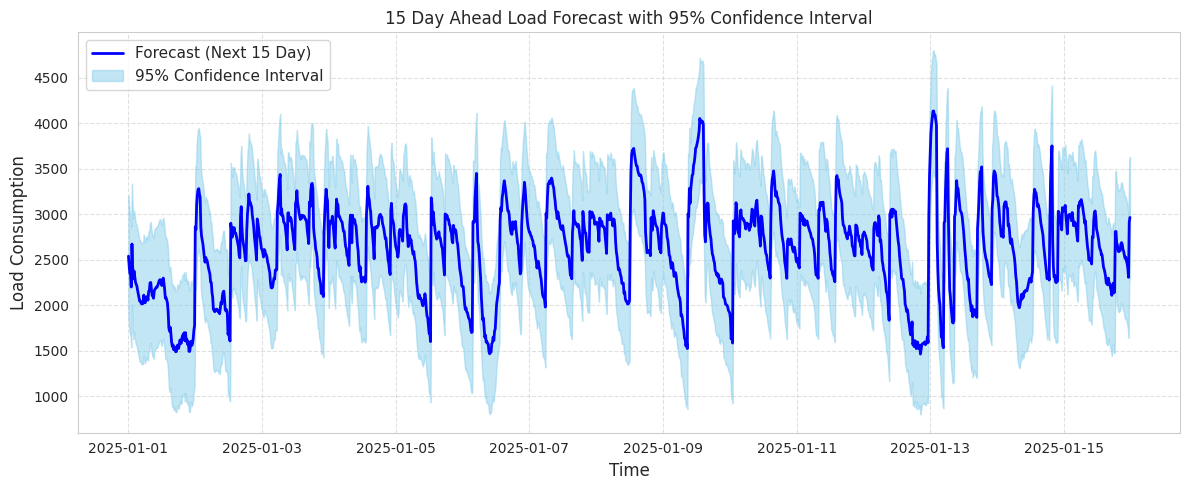

In [47]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")

# Plot forecasted values
plt.plot(long_forecast_df['date_time'], long_term_forecast, label="Forecast (Next 15 Day)", color="blue", linewidth=2)

# Confidence Interval
plt.fill_between(
    long_forecast_df['date_time'],
    long_term_forecast - 1.96 * residual_std,
    long_term_forecast + 1.96 * residual_std,
    color='skyblue',
    alpha=0.5,
    label="95% Confidence Interval"
)

# Labels and Title
plt.title("15 Day Ahead Load Forecast with 95% Confidence Interval", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Load Consumption", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [81]:
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])

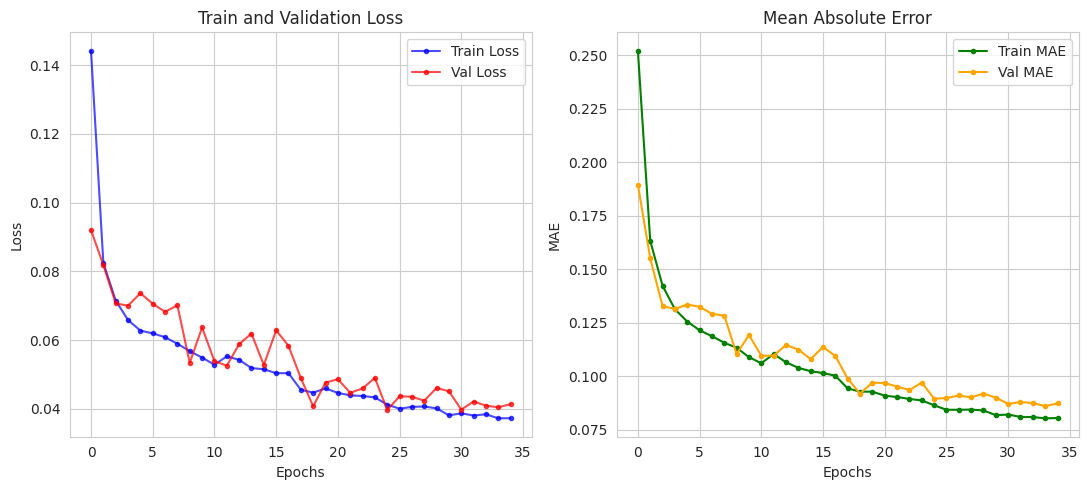

In [95]:
# Plot all metrics from history
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue',marker= "o",ms=3,alpha=0.7)
plt.plot(history.history['val_loss'], label='Val Loss', color='red',marker= "o",ms=3,alpha=0.7)
plt.title("Train and Validation Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE', color='green',marker= "o",ms=3)
plt.plot(history.history['val_mae'], label='Val MAE', color='orange',marker= "o",ms=3)
plt.title("Mean Absolute Error")
plt.xlabel("Epochs"); plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()